# Analyzing Best Selling Books - Data Visualization Portfolio Project

This project focuses on analyzing the data of the top 100 most popular books based on global sales through a series of visualizations. We'll look to identify patterns and insights on authors, genres, publisher trends, and consumer behavior.

The dataset that we will be using was obtained from Kaggle, Bestsellers Unveiled: Global Top Selling Books by Maria Nadeem. This dataset contains information about world best-selling books and it focuses on their sales volume and related details. 

#### Questions
We will be working with a list of world best-selling books that focuses on their sales volume and related details  to answer the following questions:
- Which publishers have the most books on the list?
- What are the most popular genres?
- Do some genres tend to sell more copies on average than others?
- Is there a correlation between the number of best-selling books an author or publishers has and their total sales?

## Import Libraries

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from matplotlib.ticker import MaxNLocator
import squarify
import scipy.stats as stats

## Load and Inspect Data

The dataset containing the list of best-selling books is located in the 'datasets' folder.

Let's load and inspect the data of the top 100 best-selling books.

In [284]:
books = pd.read_csv('datasets/best_selling_books.csv')

In [285]:
books.head()

,Rank,Title,Author,Volume Sales,Publisher,Genre
0,1,"Da Vinci Code,The","Brown, Dan","5,094,805",Transworld,"Crime, Thriller & Adventure"
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.","4,475,152",Bloomsbury,Children's Fiction
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.","4,200,654",Bloomsbury,Children's Fiction
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.","4,179,479",Bloomsbury,Children's Fiction
4,5,Fifty Shades of Grey,"James, E. L.","3,758,936",Random House,Romance & Sagas


In [286]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          100 non-null    int64 
 1   Title         100 non-null    object
 2   Author        100 non-null    object
 3   Volume Sales  100 non-null    object
 4   Publisher     100 non-null    object
 5   Genre         100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [287]:
books.describe(include = 'all')

,Rank,Title,Author,Volume Sales,Publisher,Genre
count,100.000000,100,100,100,100,100
unique,NaN,100,67,100,16,21
top,NaN,"Da Vinci Code,The","Rowling, J.K.","5,094,805",Random House,General & Literary Fiction
freq,NaN,1,9,1,19,33
mean,50.500000,NaN,NaN,NaN,NaN,NaN
std,29.011492,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,25.750000,NaN,NaN,NaN,NaN,NaN
50%,50.500000,NaN,NaN,NaN,NaN,NaN
75%,75.250000,NaN,NaN,NaN,NaN,NaN


In [288]:
books.Genre.unique()

array(['Crime, Thriller & Adventure', "Children's Fiction",
       'Romance & Sagas', 'Young Adult Fiction',
       'General & Literary Fiction', 'Popular Science', 'Picture Books',
       'Food & Drink: General', 'Humour: Collections & General',
       'Autobiography: General', 'Biography: The Arts',
       'Science Fiction & Fantasy', 'Fitness & Diet',
       'Usage & Writing Guides',
       'Popular Culture & Media: General Interest',
       'Autobiography: The Arts', 'Current Affairs & Issues',
       'Travel Writing', 'National & Regional Cuisine',
       "Children's Annuals", 'Biography: General'], dtype=object)

In [289]:
books.Publisher.unique()

array(['Transworld', 'Bloomsbury', 'Random House', 'Little, Brown Book',
       'Quercus', 'Pan Macmillan', 'Penguin', 'Hodder & Stoughton',
       'Canongate', 'HarperCollins', 'Orion', 'Scholastic Ltd.',
       'Headline', 'Profile Books Group',
       'Random House Childrens Books G', 'D.C. Thomson'], dtype=object)

In [290]:
books.Author.unique()

array(['Brown, Dan', 'Rowling, J.K.', 'James, E. L.', 'Meyer, Stephenie',
       'Larsson, Stieg', 'Sebold, Alice', 'Haddon, Mark', 'Bryson, Bill',
       'Carle, Eric', 'Donaldson, Julia', 'Oliver, Jamie',
       'Hosseini, Khaled', 'Nicholls, David', 'Niffenegger, Audrey',
       'McEwan, Ian', 'Fielding, Helen', 'Clarkson, Jeremy',
       'Bernieres, Louis de', 'Kay, Peter', 'Martel, Yann',
       'Stephenson, Pamela', 'Pelzer, Dave', 'McCourt, Frank',
       'Faulks, Sebastian', 'Pullman, Philip', 'Mosse, Kate',
       'Stockett, Kathryn', 'Parsons, Tony', 'Golden, Arthur',
       'McCall Smith, Alexander', 'Hislop, Victoria', 'Ahern, Cecelia',
       'McKeith, Gillian', 'Zafon, Carlos Ruiz', 'Grisham, John',
       'Atkins, Robert C.', 'Truss, Lynne', 'Smith, Delia',
       'Harris, Joanne', 'Boyne, John', 'Picoult, Jodi', 'Lee, Harper',
       'Gray, John', 'French, Dawn', 'Lewycka, Marina', 'Harris, Thomas',
       'Tolkien, J. R. R.', 'Moore, Michael', 'Rubenfeld, Jed',
       

In [291]:
books[books.Author == '0']

,Rank,Title,Author,Volume Sales,Publisher,Genre
90,91,"""Beano"" Annual,The",0,"816,585",D.C. Thomson,Children's Annuals


Initial Observations:
- The data includes the name of the book, the author, the publisher, the genre, total number of sales and it's rank in the top 100 list.
- The `Volume Sales` column is currently of type `object` when it should be of type `int`.
- There are 21 unique `Genre` categories, which can be reduced down to broader groups to help with analysis.
- There are a handful of publishers listed that are owned by the same parent company.
- There is one book record for 'The Beano Annual' that is written by various authors, but currently lists the author as `0`
- Some of the publisher names are very long and can be condensed to help make our visualizations easier to read.

## Data Cleaning & Preparation

Before we begin to answer our questions on the data, we will need to clean and prepare the dataset in order to effectively analyze and visualize the data.

Here are some updates we will be making:
- Replace any space characters in the column names with an underscore and lowercase all characters to provide easier access to columns.
- Change the data type of the `Volume Sales` column from `object` to `int`.
- Create an additional column named `general_genre`, which will to reduce the number of unique genre categories into broader groups. This will allow for easier trend analysis while maintaining meaningful distinctions.
- Create an additional column named `parent_company`, which will group together publishers that are owned by the same company and list them as `Independent` if there is no parent company.
- Replace any instances where `Author` is `0` to have a value of `Various Authors`.
- Create a new column that includes an abbreviated version of the publishers name to make it more concise for use in our visualizations.
- Create new columns called `first_name` and `last_name` where we extract those values from the `author` column.

In [292]:
# Replace spaces with underscore and lowercase all characters in column names
books.columns = books.columns.str.replace(' ', '_').str.lower()
books.columns

Index(['rank', 'title', 'author', 'volume_sales', 'publisher', 'genre'], dtype='object')

In [293]:
# Change data type of 'volume_sales' from 'object' to 'int'
books.volume_sales = books.volume_sales.str.replace(',', '').astype('int')
books.volume_sales.dtype

dtype('int64')

In [294]:
# Create broader genre groups through mapping

# Define the genre mapping
genre_mapping = {
    'Crime, Thriller & Adventure': 'Thriller & Mystery',
    'Science Fiction & Fantasy': 'Science Fiction & Fantasy',
    "Children's Fiction": "Children's Books",
    'Picture Books': "Children's Books",
    "Children's Annuals": "Children's Books",
    'Young Adult Fiction': 'Young Adult',
    'Romance & Sagas': 'Romance',
    'General & Literary Fiction': 'Fiction',
    'Popular Science': 'Non-Fiction',
    'Travel Writing': 'Non-Fiction',
    'Current Affairs & Issues': 'Non-Fiction',
    'Popular Culture & Media: General Interest': 'Non-Fiction',
    'Autobiography: General': 'Biography & Memoir',
    'Biography: The Arts': 'Biography & Memoir',
    'Autobiography: The Arts': 'Biography & Memoir',
    'Biography: General': 'Biography & Memoir',
    'Humour: Collections & General': 'Lifestyle & Entertainment',
    'Food & Drink: General': 'Lifestyle & Entertainment',
    'National & Regional Cuisine': 'Lifestyle & Entertainment',
    'Fitness & Diet': 'Lifestyle & Entertainment',
    'Usage & Writing Guides': 'Lifestyle & Entertainment'
}

# Map the original genres to the list of general genres
books['general_genre'] = books.genre.map(genre_mapping)
books.head()

,rank,title,author,volume_sales,publisher,genre,general_genre
0,1,"Da Vinci Code,The","Brown, Dan",5094805,Transworld,"Crime, Thriller & Adventure",Thriller & Mystery
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.",4475152,Bloomsbury,Children's Fiction,Children's Books
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.",4200654,Bloomsbury,Children's Fiction,Children's Books
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.",4179479,Bloomsbury,Children's Fiction,Children's Books
4,5,Fifty Shades of Grey,"James, E. L.",3758936,Random House,Romance & Sagas,Romance


In [295]:
# Create a column based on parent company through mapping

# Define the publisher mapping
parent_company_mapping = {
    'Transworld': 'Penguin Random House',
    'Random House': 'Penguin Random House',
    'Random House Childrens Books G': 'Penguin Random House',
    'Penguin': 'Penguin Random House',
    
    'Little, Brown Book': 'Hachette Livre',
    'Hodder & Stoughton': 'Hachette Livre',
    'Orion': 'Hachette Livre',
    'Headline': 'Hachette Livre',
    'Quercus': 'Hachette Livre',
    
    'Pan Macmillan': 'Holtzbrinck Publishing',
    
    'HarperCollins': 'News Corp',
    
    'Scholastic Ltd.': 'Scholastic Corporation',
    
    'Bloomsbury': 'Independent',
    'Canongate': 'Independent',
    'Profile Books Group': 'Independent',
    'D.C. Thomson': 'Independent'
}

# Map the publisher to the list of parent companies
books['parent_company'] = books.publisher.map(parent_company_mapping)
books.head()

,rank,title,author,volume_sales,publisher,genre,general_genre,parent_company
0,1,"Da Vinci Code,The","Brown, Dan",5094805,Transworld,"Crime, Thriller & Adventure",Thriller & Mystery,Penguin Random House
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.",4475152,Bloomsbury,Children's Fiction,Children's Books,Independent
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.",4200654,Bloomsbury,Children's Fiction,Children's Books,Independent
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.",4179479,Bloomsbury,Children's Fiction,Children's Books,Independent
4,5,Fifty Shades of Grey,"James, E. L.",3758936,Random House,Romance & Sagas,Romance,Penguin Random House


In [296]:
# Replace values of '0' in author column with 'Various Authors'
books.author = books.author.replace('0', 'Various Authors')
books[books.author.str.contains('0')]

,rank,title,author,volume_sales,publisher,genre,general_genre,parent_company


In [297]:
# Create a column to abbreviate long publisher names

# Define mapping of original publisher names to their abbreviations
publisher_abbreviations = {
    'Little, Brown Book': 'Little Brown',
    'Hodder & Stoughton': 'Hodder',
    'Scholastic Ltd.': 'Scholastic',
    'Profile Books Group': 'Profile Books',
    'Random House Childrens Books G': 'Random House Kids'
}

# Replace the publisher names with with abbreviations
books['publisher_abbrev'] = books.publisher.replace(publisher_abbreviations)
books.publisher_abbrev.unique()

array(['Transworld', 'Bloomsbury', 'Random House', 'Little Brown',
       'Quercus', 'Pan Macmillan', 'Penguin', 'Hodder', 'Canongate',
       'HarperCollins', 'Orion', 'Scholastic', 'Headline',
       'Profile Books', 'Random House Kids', 'D.C. Thomson'], dtype=object)

In [298]:
books['first_name'] = books.author.str.split(', ', expand = True)[1]
books['last_name'] = books.author.str.split(', ', expand = True)[0]
books.head()

,rank,title,author,volume_sales,publisher,genre,general_genre,parent_company,publisher_abbrev,first_name,last_name
0,1,"Da Vinci Code,The","Brown, Dan",5094805,Transworld,"Crime, Thriller & Adventure",Thriller & Mystery,Penguin Random House,Transworld,Dan,Brown
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.",4475152,Bloomsbury,Children's Fiction,Children's Books,Independent,Bloomsbury,J.K.,Rowling
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.",4200654,Bloomsbury,Children's Fiction,Children's Books,Independent,Bloomsbury,J.K.,Rowling
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.",4179479,Bloomsbury,Children's Fiction,Children's Books,Independent,Bloomsbury,J.K.,Rowling
4,5,Fifty Shades of Grey,"James, E. L.",3758936,Random House,Romance & Sagas,Romance,Penguin Random House,Random House,E. L.,James


In [299]:
books.first_name.unique()

array(['Dan', 'J.K.', 'E. L.', 'Stephenie', 'Stieg', 'Alice', 'Mark',
       'Bill', 'Eric', 'Julia', 'Jamie', 'Khaled', 'David', 'Audrey',
       'Ian', 'Helen', 'Jeremy', 'Louis de', 'Peter', 'Yann', 'Pamela',
       'Dave', 'Frank', 'Sebastian', 'Philip', 'Kate', 'Kathryn', 'Tony',
       'Arthur', 'Alexander', 'Victoria', 'Cecelia', 'Gillian',
       'Carlos Ruiz', 'John', 'Robert C.', 'Lynne', 'Delia', 'Joanne',
       'Jodi', 'Harper', 'Dawn', 'Marina', 'Thomas', 'J. R. R.',
       'Michael', 'Jed', 'Sharon', 'Paulo', 'Paul', 'Andrea', 'Nigella',
       'Monica', 'Kim', 'Nick', 'Russell', 'Richard', None, 'Zadie',
       'Markus', 'Maeve', 'Robert', 'Suzanne'], dtype=object)

In [300]:
books.last_name.unique()

array(['Brown', 'Rowling', 'James', 'Meyer', 'Larsson', 'Sebold',
       'Haddon', 'Bryson', 'Carle', 'Donaldson', 'Oliver', 'Hosseini',
       'Nicholls', 'Niffenegger', 'McEwan', 'Fielding', 'Clarkson',
       'Bernieres', 'Kay', 'Martel', 'Stephenson', 'Pelzer', 'McCourt',
       'Faulks', 'Pullman', 'Mosse', 'Stockett', 'Parsons', 'Golden',
       'McCall Smith', 'Hislop', 'Ahern', 'McKeith', 'Zafon', 'Grisham',
       'Atkins', 'Truss', 'Smith', 'Harris', 'Boyne', 'Picoult', 'Lee',
       'Gray', 'French', 'Lewycka', 'Tolkien', 'Moore', 'Rubenfeld',
       'Osbourne', 'Coelho', "O'Grady", 'McKenna', 'Levy', 'Lawson',
       'Ali', 'Edwards', 'Hornby', 'Brand', 'Dawkins', 'Various Authors',
       'Morton', 'Zusak', 'Binchy', 'Collins'], dtype=object)

In [301]:
# Review our cleaned up dataset
books.head()

,rank,title,author,volume_sales,publisher,genre,general_genre,parent_company,publisher_abbrev,first_name,last_name
0,1,"Da Vinci Code,The","Brown, Dan",5094805,Transworld,"Crime, Thriller & Adventure",Thriller & Mystery,Penguin Random House,Transworld,Dan,Brown
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.",4475152,Bloomsbury,Children's Fiction,Children's Books,Independent,Bloomsbury,J.K.,Rowling
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.",4200654,Bloomsbury,Children's Fiction,Children's Books,Independent,Bloomsbury,J.K.,Rowling
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.",4179479,Bloomsbury,Children's Fiction,Children's Books,Independent,Bloomsbury,J.K.,Rowling
4,5,Fifty Shades of Grey,"James, E. L.",3758936,Random House,Romance & Sagas,Romance,Penguin Random House,Random House,E. L.,James


In [302]:
books.describe(include = 'all')

,rank,title,author,volume_sales,publisher,genre,general_genre,parent_company,publisher_abbrev,first_name,last_name
count,100.000000,100,100,1.000000e+02,100,100,100,100,100,99,100
unique,NaN,100,67,NaN,16,21,9,6,16,62,64
top,NaN,"Da Vinci Code,The","Rowling, J.K.",NaN,Random House,General & Literary Fiction,Fiction,Penguin Random House,Random House,J.K.,Rowling
freq,NaN,1,9,NaN,19,33,33,48,19,9,9
mean,50.500000,NaN,NaN,1.497272e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,29.011492,NaN,NaN,9.077396e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,7.910950e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,25.750000,NaN,NaN,9.420580e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,50.500000,NaN,NaN,1.111938e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,75.250000,NaN,NaN,1.781836e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have cleaned and prepped our book dataset, we can start answering our initial questions through data visualization.

## Data Visualizations

Before we continue, let's make some additional dataframes for the genres, publishers, parent companies, authors based on the aggregated data found in `books`. Each dataframe will include the total number of books along with the sum of volume sales. We'll also create some color palettes to use on our charts and graphs to make them visually engaging. 

In [303]:
# Get the number of books and total volume sales for each genre group
genre_data = books.groupby('general_genre').agg(num_books = ('title', 'count'), volume_sales = ('volume_sales', 'sum')).reset_index()

# Get the number of books and total volume sales by each publisher
publisher_data = books.groupby(['parent_company', 'publisher_abbrev']).agg(num_books = ('title', 'count'), volume_sales = ('volume_sales', 'sum')).reset_index()
publisher_data['avg_sales_per_book'] = publisher_data.volume_sales / publisher_data.num_books

# Get the number of books and total volume sales for each parent company
parent_data = books.groupby('parent_company').agg(num_books = ('title', 'count'), volume_sales = ('volume_sales', 'sum')).reset_index()


# Get the number of books and total volume sales for each author
author_data = books.groupby('author').agg(num_books = ('title', 'count'), volume_sales = ('volume_sales', 'sum'), first_name = ('first_name', 'first'), last_name = ('last_name', 'first')).reset_index()
author_data['avg_sales_per_book'] = author_data.volume_sales / author_data.num_books

In [304]:
author_data

,author,num_books,volume_sales,first_name,last_name,avg_sales_per_book
0,"Ahern, Cecelia",1,1107379,Cecelia,Ahern,1107379.0
1,"Ali, Monica",1,856540,Monica,Ali,856540.0
2,"Atkins, Robert C.",1,1054196,Robert C.,Atkins,1054196.0
3,"Bernieres, Louis de",1,1352318,Louis de,Bernieres,1352318.0
4,"Binchy, Maeve",1,808900,Maeve,Binchy,808900.0
...,...,...,...,...,...,...
62,"Tolkien, J. R. R.",1,967466,J. R. R.,Tolkien,967466.0
63,"Truss, Lynne",1,1023688,Lynne,Truss,1023688.0
64,Various Authors,1,816585,None,Various Authors,816585.0
65,"Zafon, Carlos Ruiz",1,1092349,Carlos Ruiz,Zafon,1092349.0


In [305]:

nature_palette = ['#587B7F', '#A6D6B2', '#F4A300', '#F1E3D1', '#D85D0B']
warm_palette = ['#F8C7B6', '#E6A57E', '#BC8267', '#9B5B3A', '#7A3C32']

classic_palette = ['#2E3B4E',  # Deep Blue-Gray  
                   '#B86B52',  # Warm Brick Red  
                   '#D9A84C',  # Muted Gold  
                   '#8C6A5D',  # Desaturated Brown  
                   '#4F6D7A',  # Cool Slate Blue  
                   '#E2C799',  # Soft Sand  
                   '#6B8E23',  # Olive Green  
                   '#A05A2C',  # Burnt Orange  
                   '#5D576B']  # Dusty Purple  



# Map a color to each genre and parent company
genre_data['color'] = classic_palette
parent_data['color'] = classic_palette[:6]

In [306]:
sns.color_palette(classic_palette)

[(0.1803921568627451, 0.23137254901960785, 0.3058823529411765),
 (0.7215686274509804, 0.4196078431372549, 0.3215686274509804),
 (0.8509803921568627, 0.6588235294117647, 0.2980392156862745),
 (0.5490196078431373, 0.41568627450980394, 0.36470588235294116),
 (0.30980392156862746, 0.42745098039215684, 0.47843137254901963),
 (0.8862745098039215, 0.7803921568627451, 0.6),
 (0.4196078431372549, 0.5568627450980392, 0.13725490196078433),
 (0.6274509803921569, 0.35294117647058826, 0.17254901960784313),
 (0.36470588235294116, 0.3411764705882353, 0.4196078431372549)]

### What are the most popular genres?

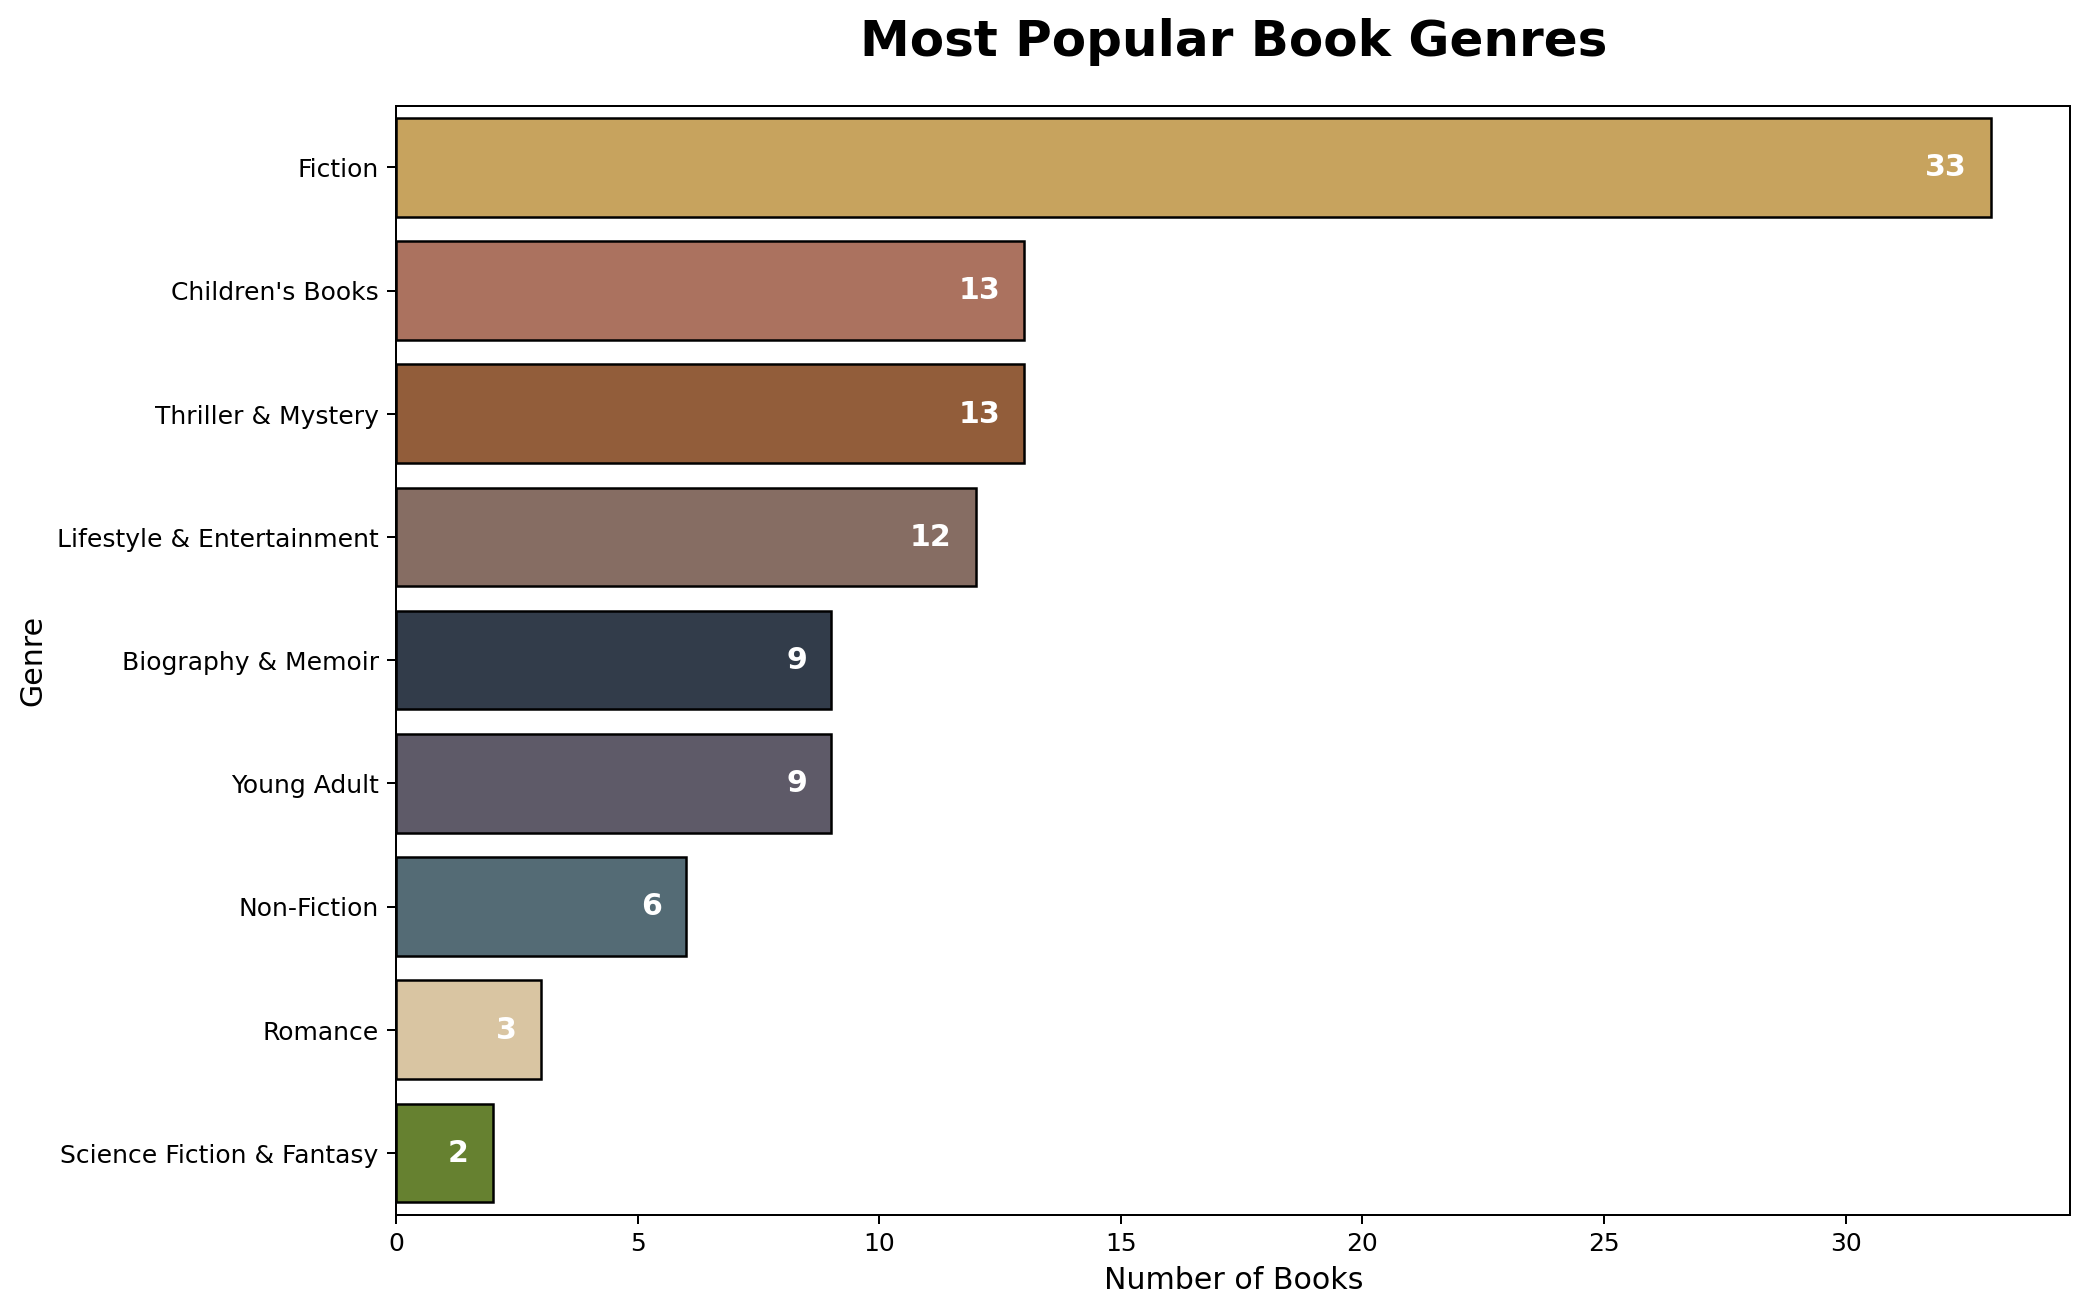

In [323]:
plt.figure(figsize = (12,8), dpi = 180)

# Create dataframe sorted by number of books
gen_book_sorted = genre_data.sort_values(by = 'num_books', ascending = False)

# Plot a bar graph with the number of books each genre has in top 100
genre_bar = sns.barplot(data = gen_book_sorted, y = 'general_genre', x = 'num_books', hue = 'general_genre', palette = dict(zip(genre_data.general_genre, genre_data.color)), edgecolor = 'black')
genre_bar.set_title('Most Popular Book Genres', fontsize = 20, fontweight = 'bold', pad = 20)
genre_bar.set_ylabel('Genre', fontsize = 12)
genre_bar.set_xlabel('Number of Books', fontsize = 12)

# Annotate bars with exact values
for p in genre_bar.patches:
    genre_bar.annotate(f'{p.get_width():.0f}', (p.get_width() - 0.5, p.get_y() + p.get_height() / 2), ha = 'right', va = 'center', fontsize = 12, color = 'white', fontweight = 'bold')

plt.show()

The bar graph above reveals `Fiction` books dominate the top 100 bestsellers, accounting for nearly a third of the list. `Children's Books` and `Thriller & Mystery` follow closely behind as the next most popular genres. On the other hand, `Science Fiction & Fantasy` seem to have less mainstream appeal, with only two books on the list. 

### Do some genres tend to sell more copies on average than others?

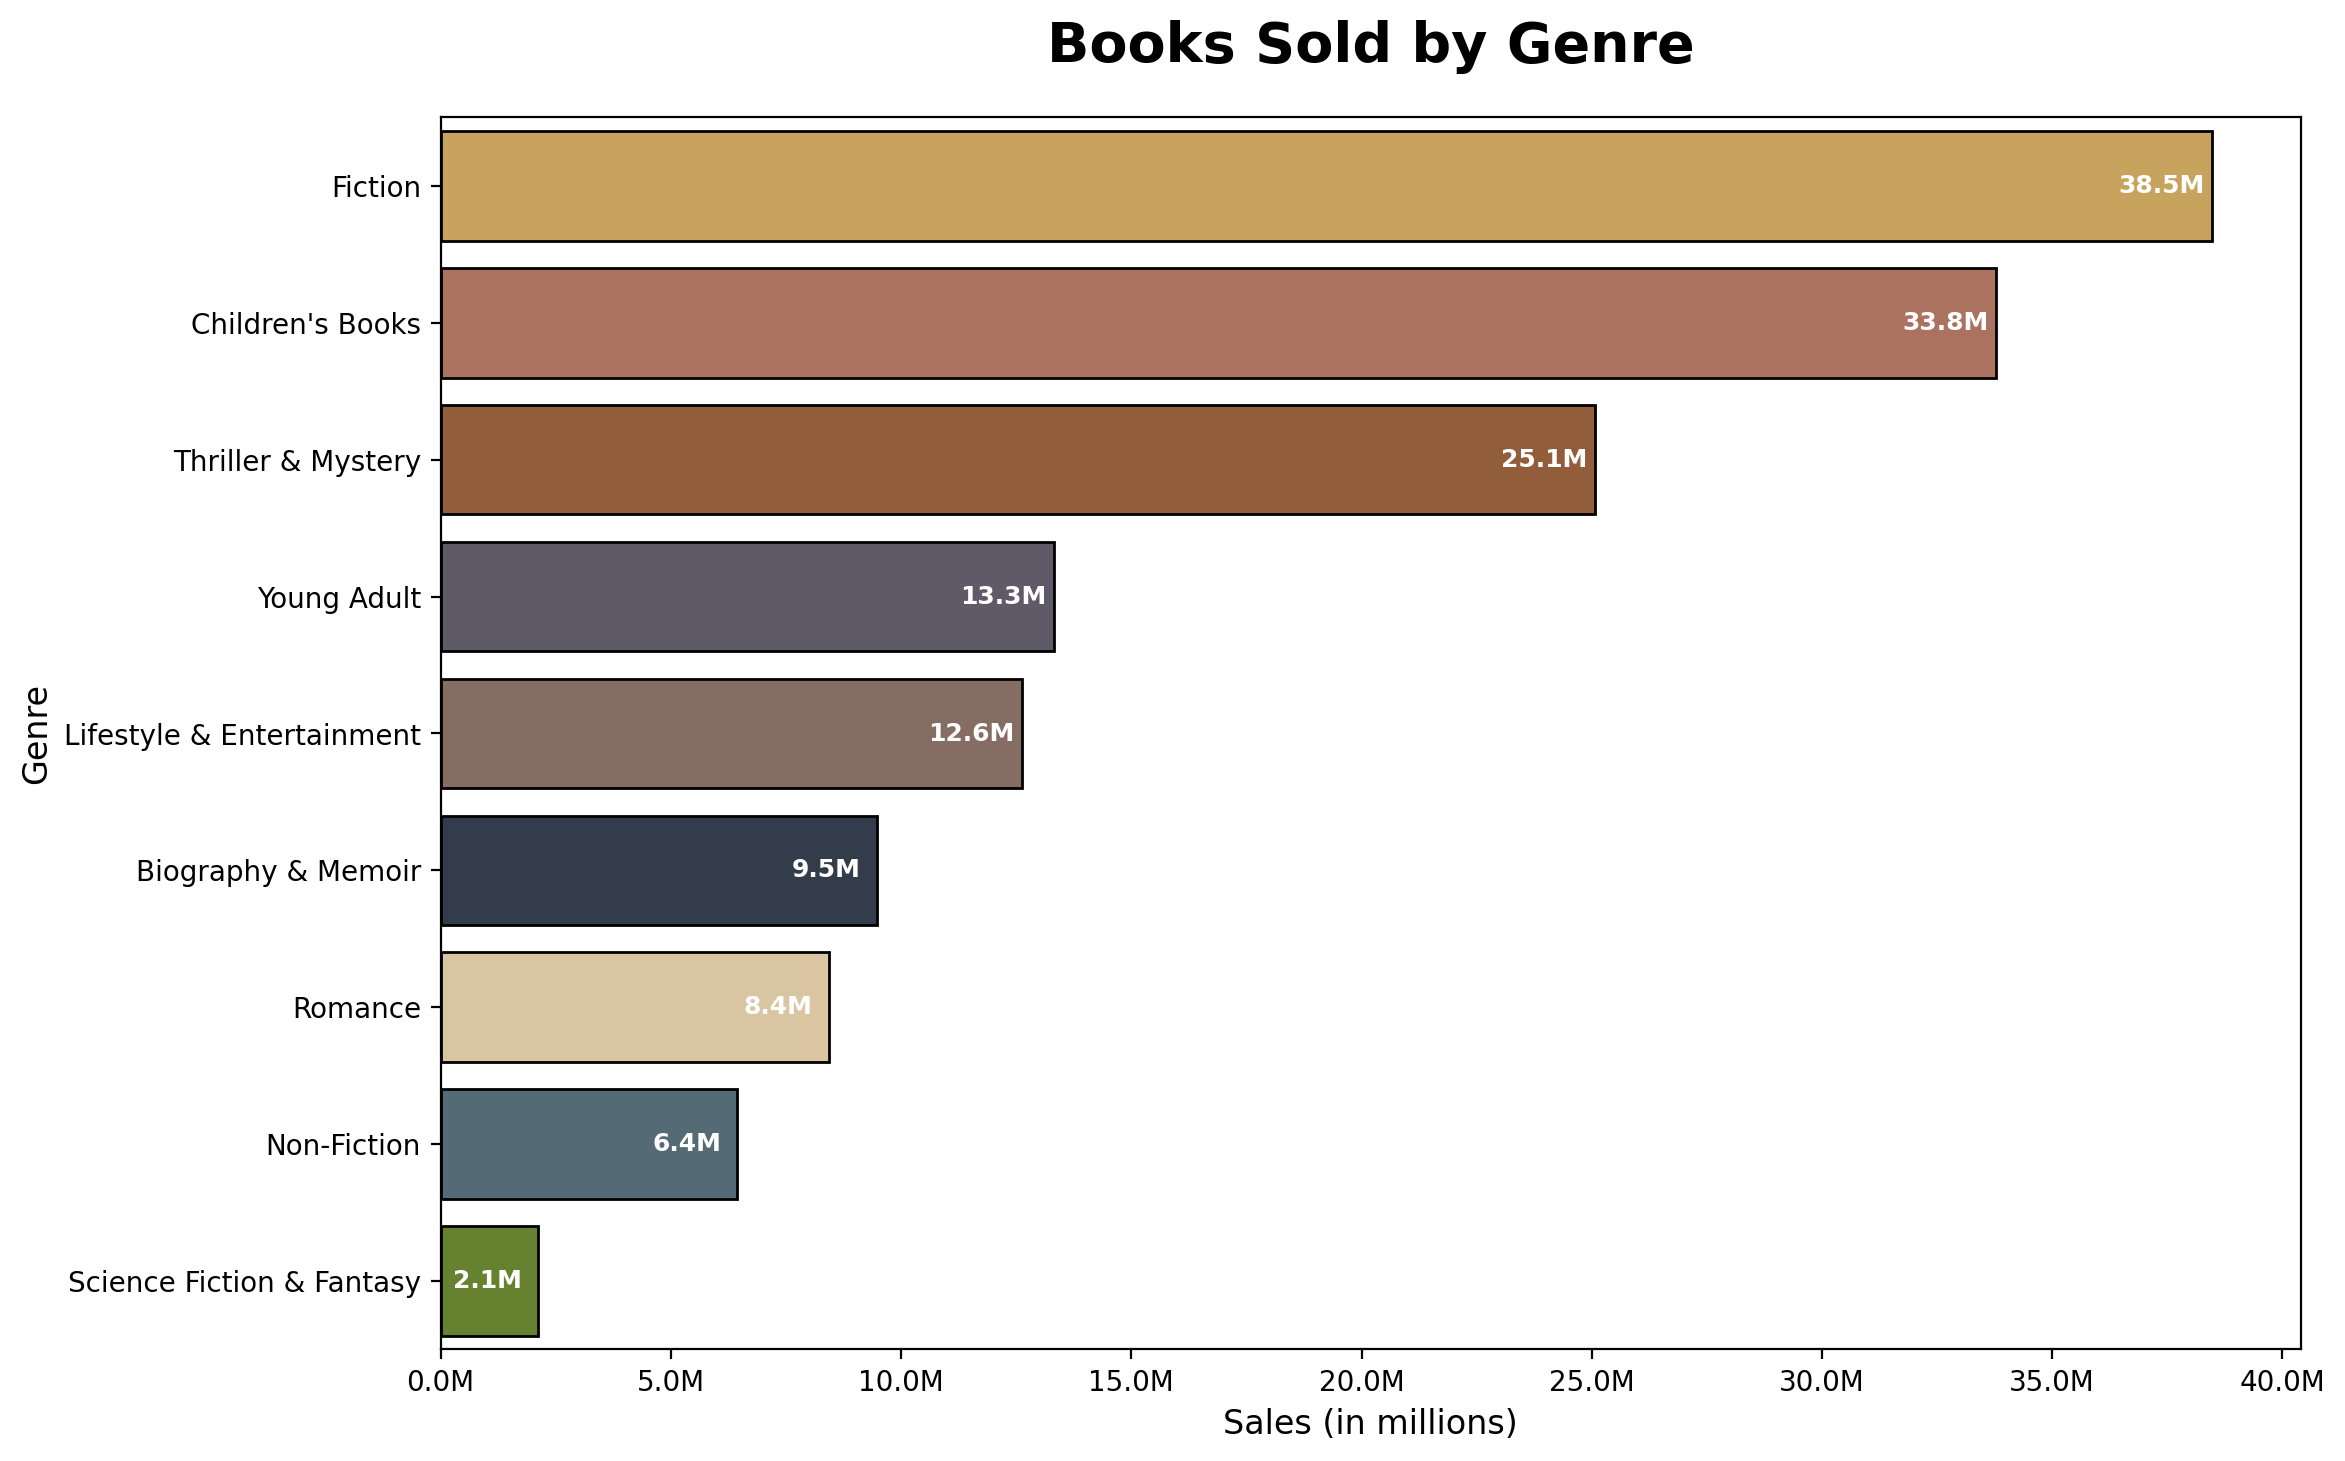

In [322]:
plt.figure(figsize = (12,8), dpi = 200)

# Create dataframe sorted by volume sales
gen_sale_sorted = genre_data.sort_values(by = 'volume_sales', ascending = False)

# Plot a bar graph with the total sales of each genre
genre_bar2 = sns.barplot(data = gen_sale_sorted, y = 'general_genre', x = 'volume_sales', hue = 'general_genre', palette = dict(zip(genre_data.general_genre, genre_data.color)), edgecolor = 'black')
genre_bar2.set_title('Books Sold by Genre', fontsize = 20, fontweight = 'bold', pad = 20)
genre_bar2.set_ylabel('Genre', fontsize = 12)
genre_bar2.set_xlabel('Sales (in millions)', fontsize = 12)

# Define function to format sales numbers in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'
genre_bar2.xaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

# Annotate bars with sales numbers
for p in genre_bar2.patches:
    genre_bar2.annotate(f'{p.get_width() / 1e6:.1f}M', (p.get_width() - 1.1e6, p.get_y() + p.get_height() / 2),  # Adjust position
                ha='center', va='center', fontsize=9, color='white', fontweight='bold')


plt.show()

The genre rankings remain largely consistent between our graph of 'Most Popular Book Genres' and 'Books Sold by Genre'. *Fiction*, *Children's Books*, *Thriller & Mystery*, and *Science Fiction & Fantasy* retained their original placements, while the remaining genres shifted by only one or two spots. 

However, the gap between the top two genres, *Fiction* and *Children's Books*, is less pronounced in the sales graph. *Fiction* led with 38.5 million, while *Children's Books* followed closely with 33.8 million, a difference of just 5 million. This suggests that while *Children's Books* had fewer entries on the list, some individual titles were exceptionally successful. 

### Which publishers have the most books on the list?

To answer this question, we can visualize the number of books by each publisher through the use of a bar graph.

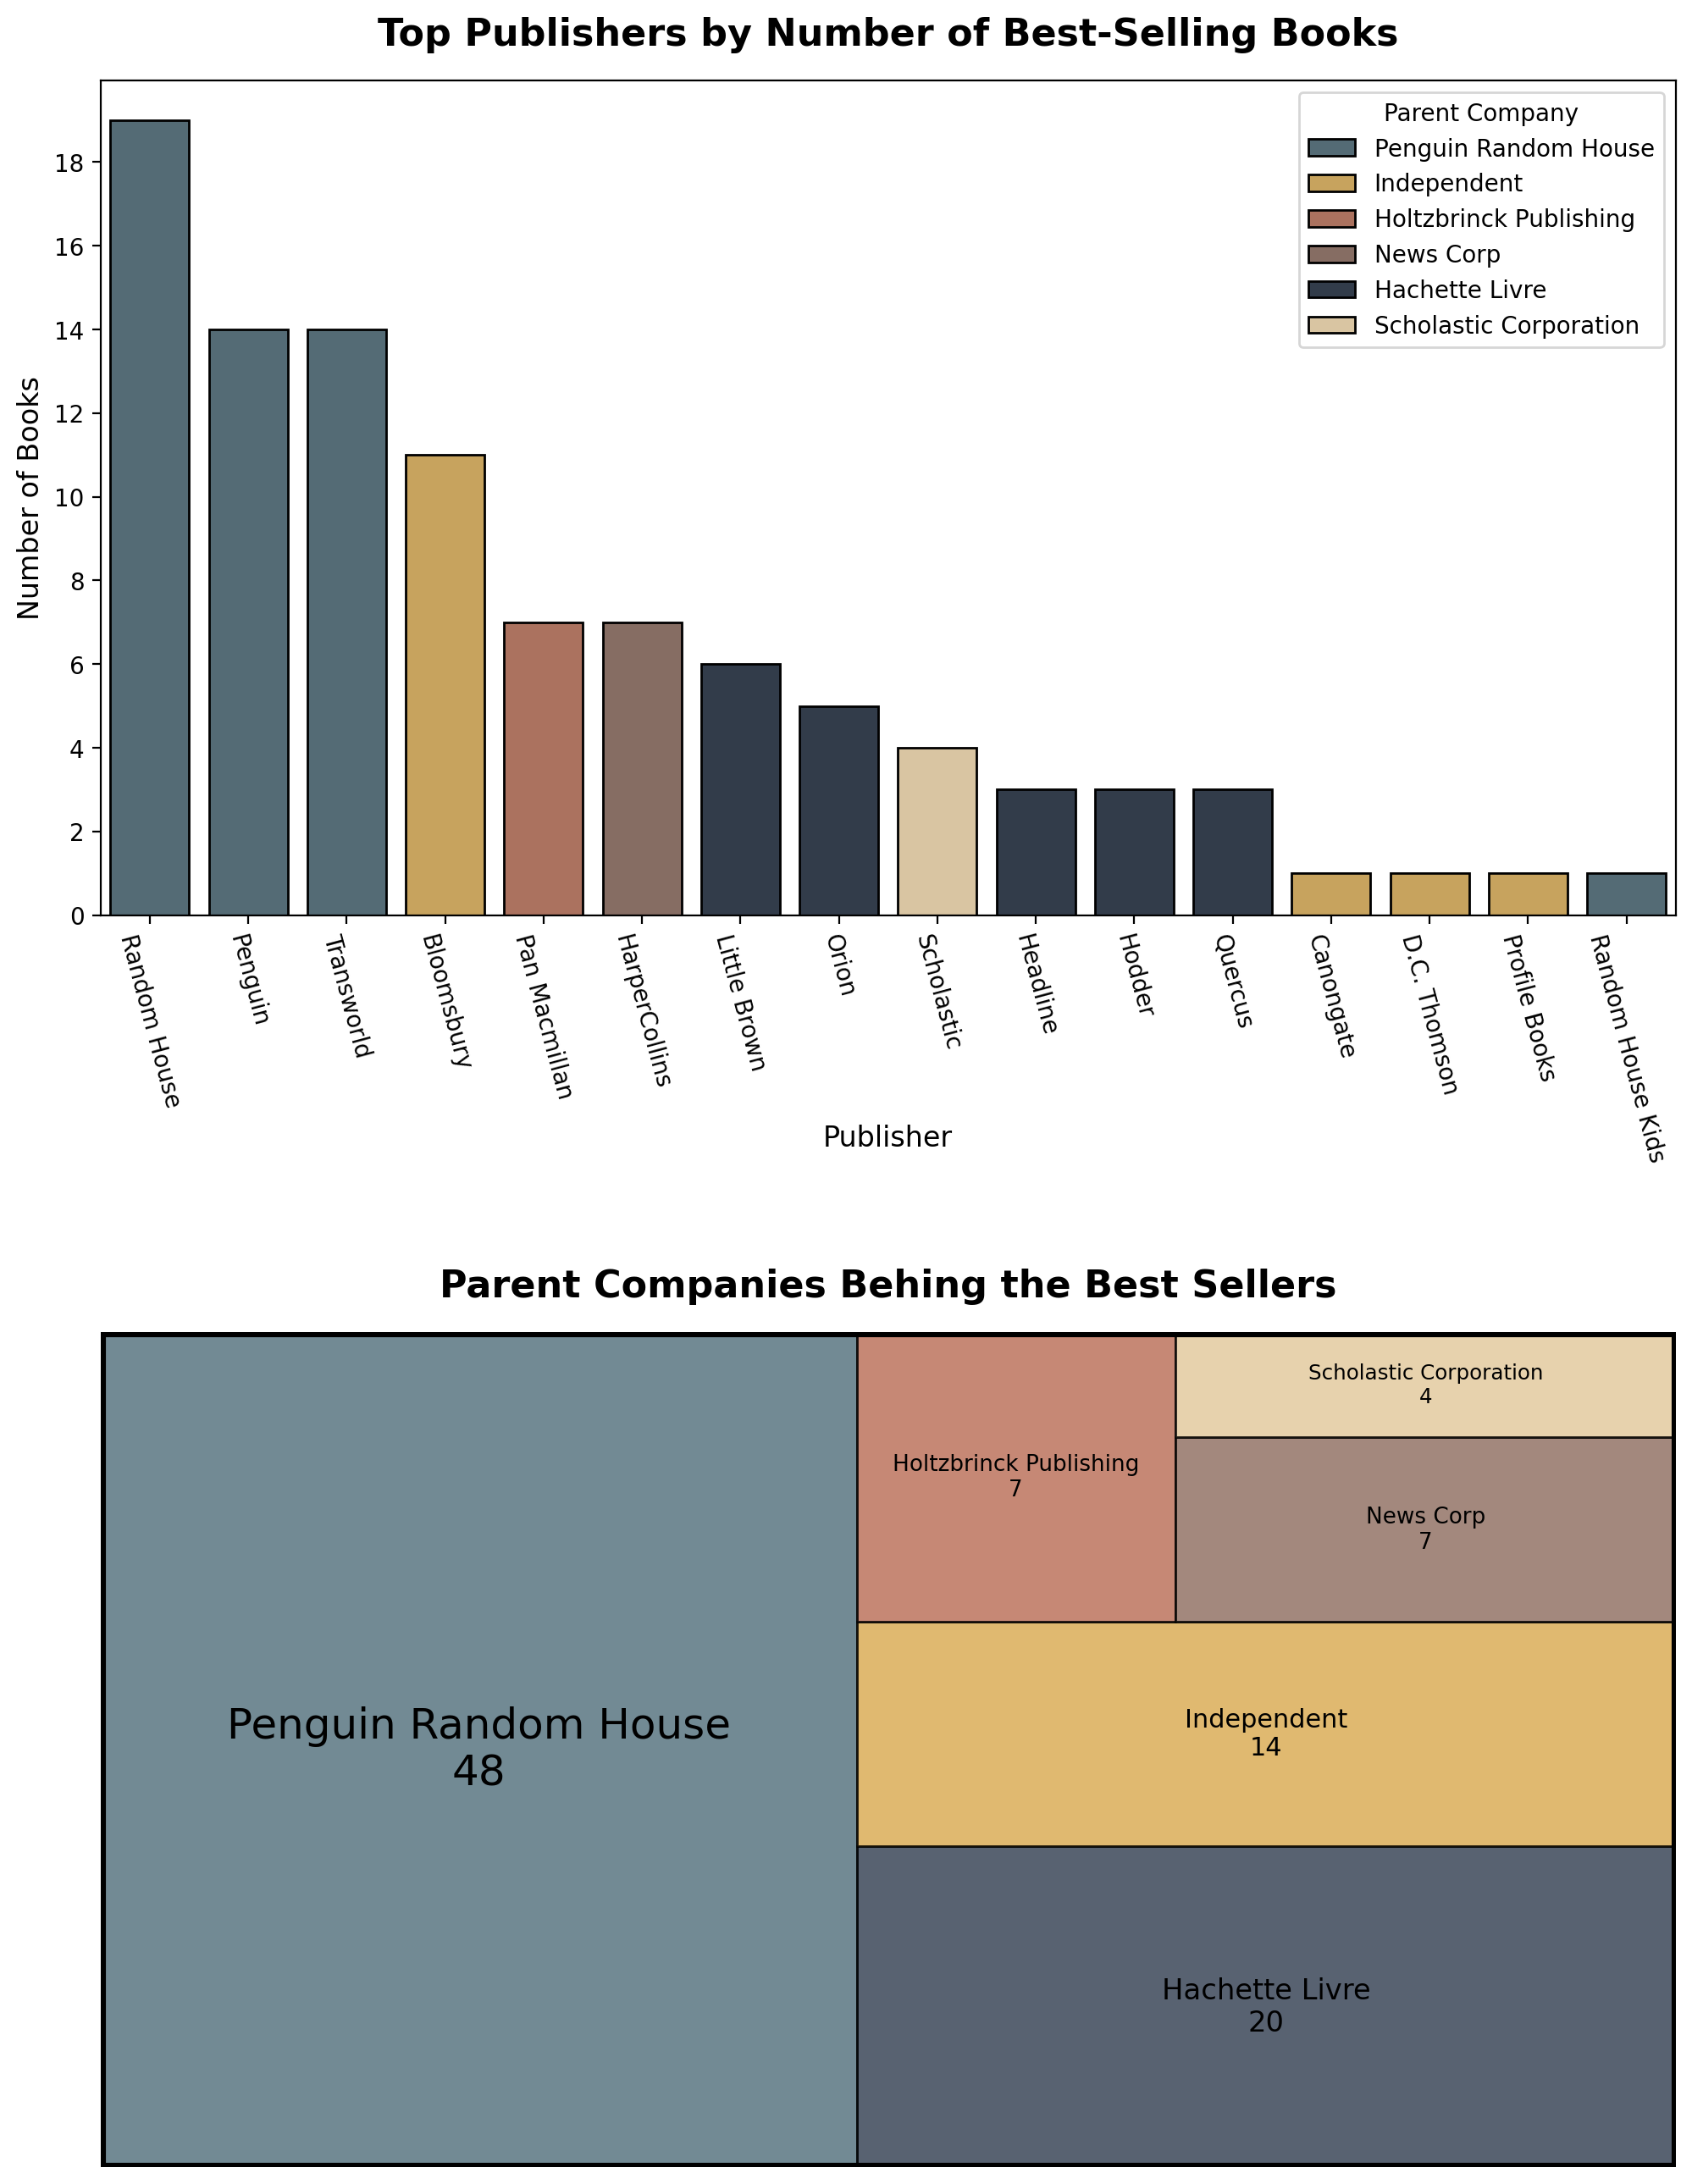

In [315]:
plt.figure(figsize = (12,16), dpi = 200)

# Create dataframe sorted by number of books
pub_book_sorted = publisher_data.sort_values(by = 'num_books', ascending = False)

# Plot bar graph with the number of books each publisher has in top 100 list
publish_bar = plt.subplot(2, 1, 1)
sns.barplot(data = pub_book_sorted, x = 'publisher_abbrev', y = 'num_books', hue = 'parent_company', palette = dict(zip(parent_data.parent_company, parent_data.color)), edgecolor = 'black')

publish_bar.set_title('Top Publishers by Number of Best-Selling Books', fontsize = 16, fontweight = 'bold', pad = 15)
publish_bar.set_ylabel('Number of Books', fontsize = 12)
publish_bar.set_xlabel('Publisher', fontsize = 12)
publish_bar.xaxis.set_label_coords(0.5, -0.25)
publish_bar.yaxis.set_major_locator(MaxNLocator(integer=True))
publish_bar.legend(title = 'Parent Company')
plt.xticks(rotation = -75)

# Plot squarify chart with the number of books each parent company has in top 100
parent_squarify = plt.subplot(2, 1, 2)
par_book_sorted = parent_data.sort_values(by = 'num_books', ascending = False)

# Generate labels with company name + number of books
labels = [f"{company}\n{num}" for company, num in zip(par_book_sorted.parent_company, par_book_sorted.num_books)]

# Create squiarify chart
parent_squarify = squarify.plot(sizes = par_book_sorted.num_books, label = labels, color = par_book_sorted.color, alpha = 0.8, edgecolor='black', linewidth = 1)

# Scale fontsize based on number of books from each company
min_font = 8  # Minimum font size
max_font = 18  # Maximum font size
scaled_fontsizes = min_font + (par_book_sorted.num_books / par_book_sorted.num_books.max()) * (max_font - min_font) # Scale based on number of books
for i, text in enumerate(parent_squarify.texts):
    text.set_fontsize(scaled_fontsizes.iloc[i]) 

# Get the limits of the treemap
x_min, x_max = parent_squarify.get_xlim()
y_min, y_max = parent_squarify.get_ylim()

# Add an outer border using a rectangle
border_rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, edgecolor='black', linewidth=4, fill=False)
parent_squarify.add_patch(border_rect)

parent_squarify.set_title('Parent Companies Behing the Best Sellers', fontsize = 16, fontweight = 'bold', pad = 15)    
parent_squarify.axis('off')

plt.subplots_adjust(hspace = 0.5)
plt.show()

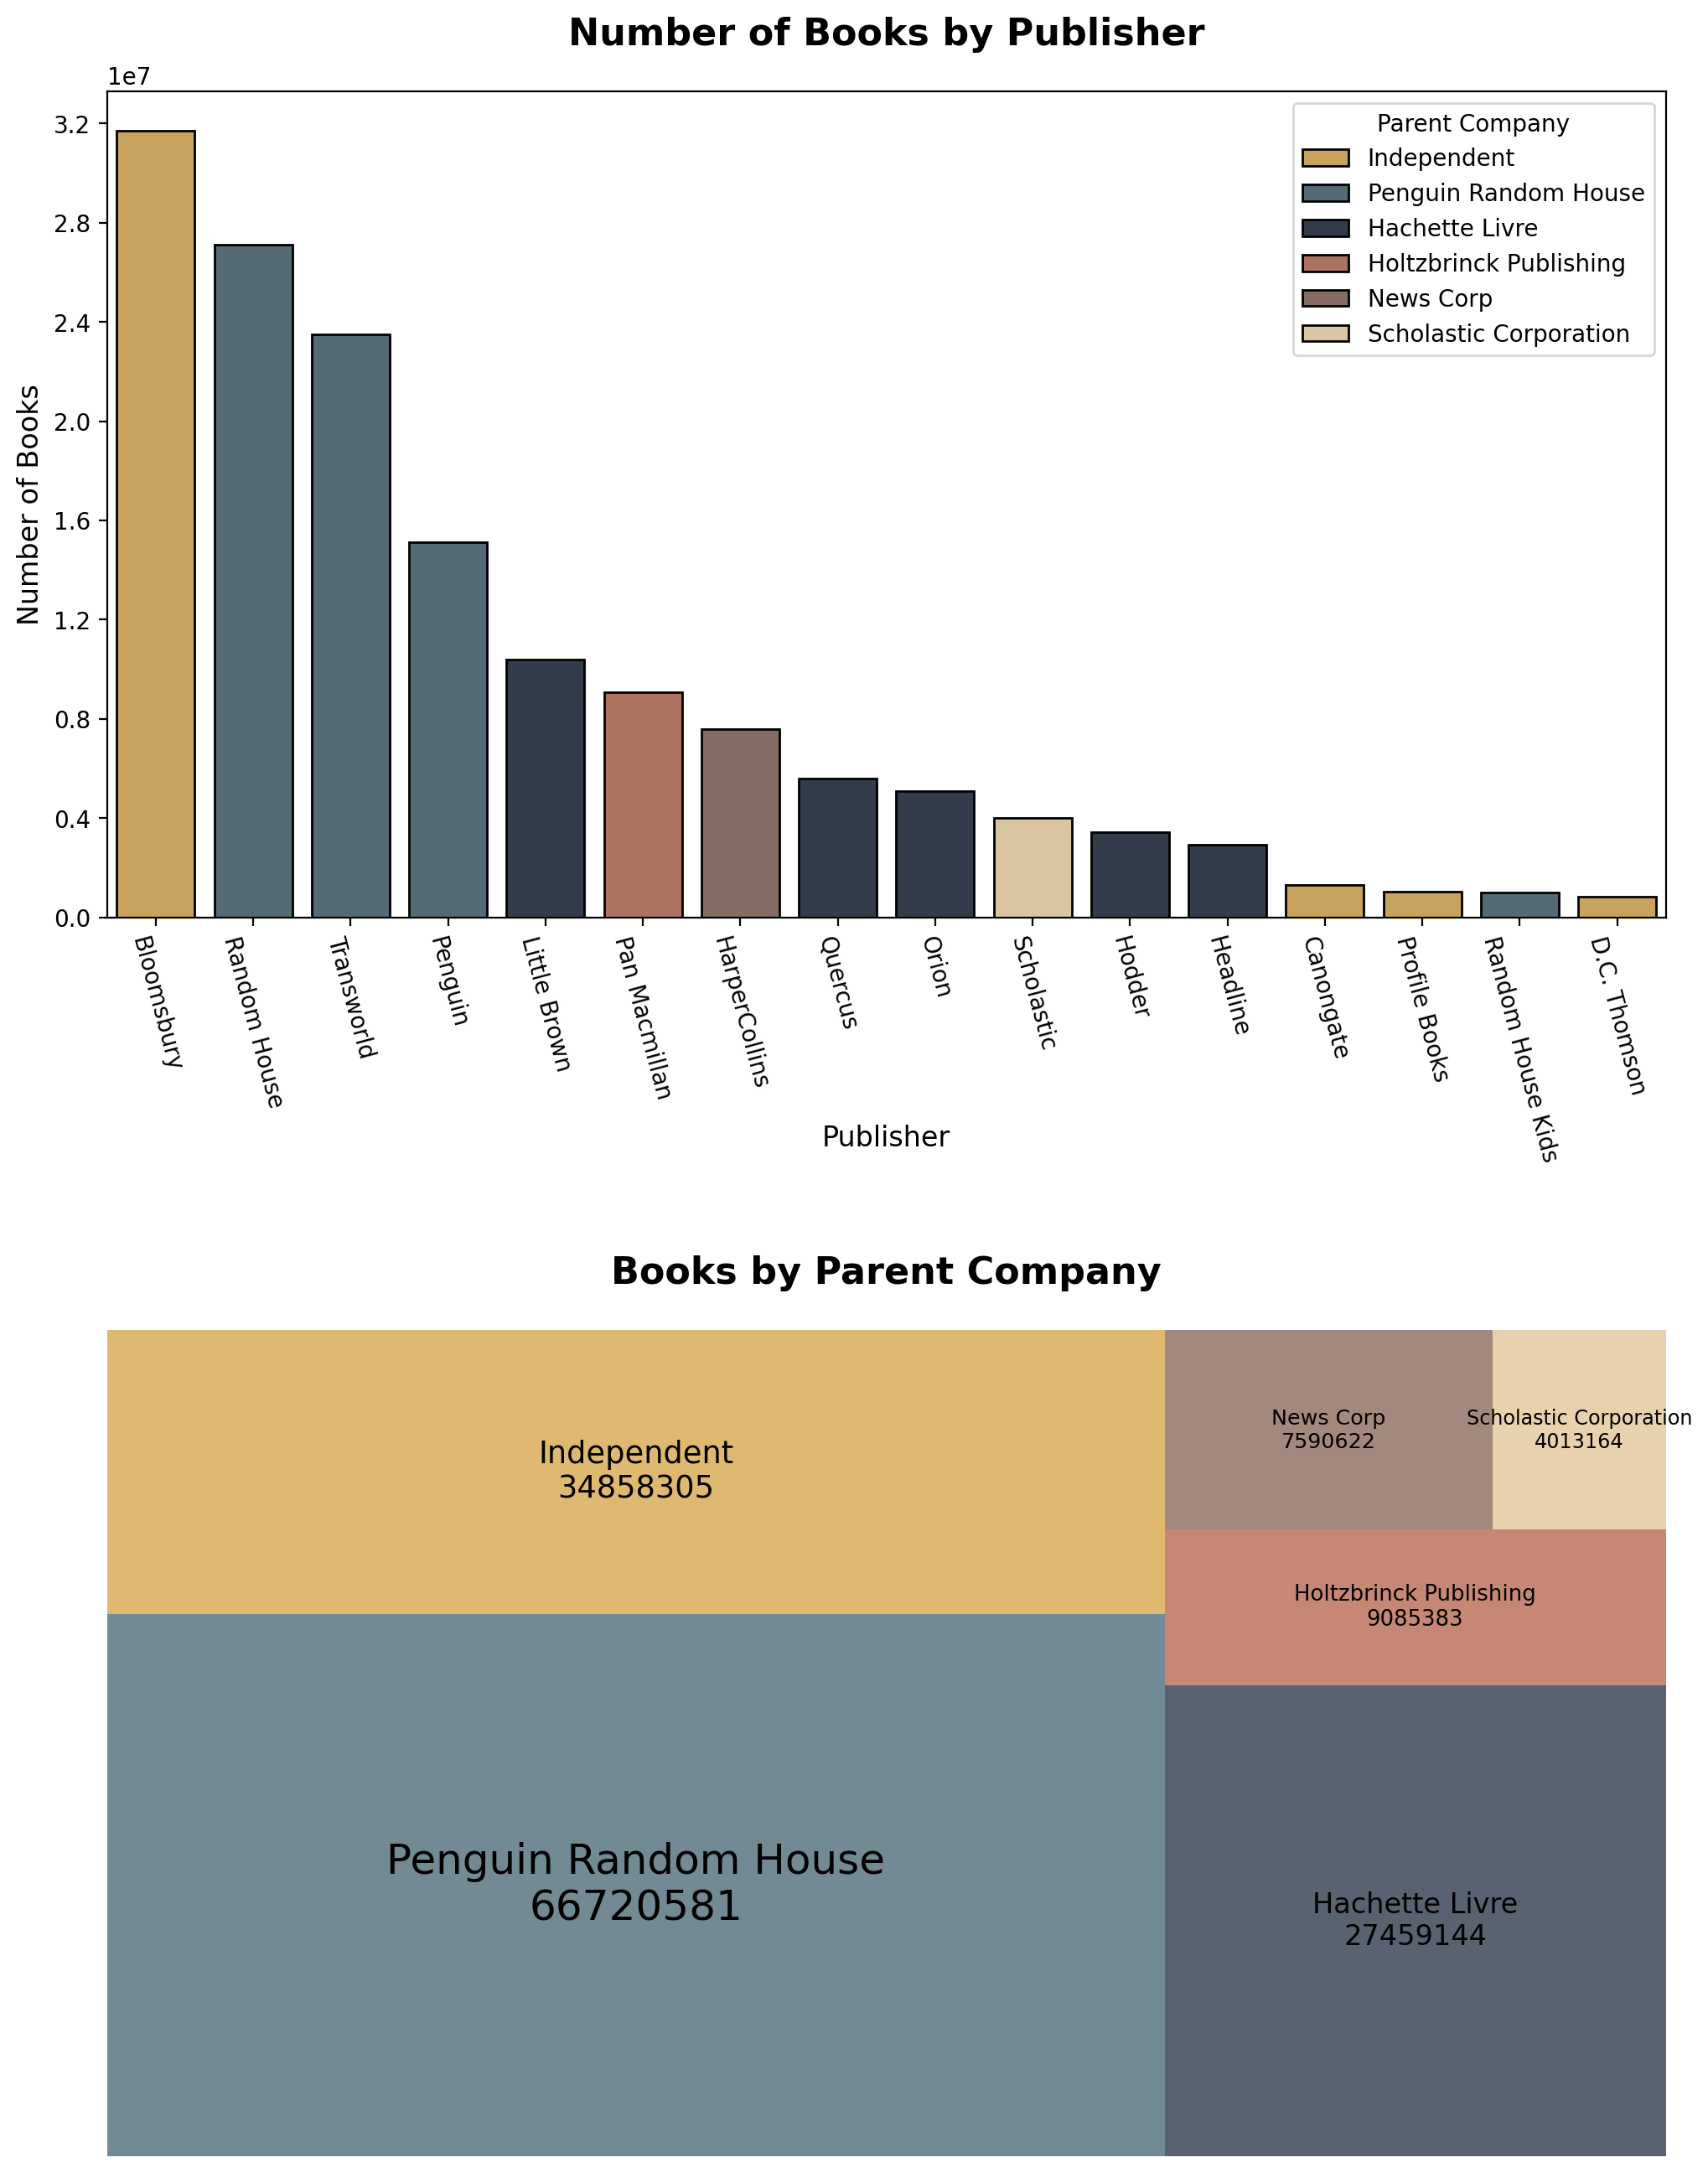

In [324]:
plt.figure(figsize = (12,16), dpi = 200)

# Sort publisher_data by volume sales
pub_sale_sorted = publisher_data.sort_values(by = 'volume_sales', ascending = False)

# Plot bar graph with the number of books each publisher has in top 100 list
publish_bar = plt.subplot(2, 1, 1)
sns.barplot(data = pub_sale_sorted, x = 'publisher_abbrev', y = 'volume_sales', hue = 'parent_company', palette = dict(zip(parent_data.parent_company, parent_data.color)), edgecolor = 'black')

publish_bar.set_title('Number of Books by Publisher', fontsize = 16, fontweight = 'bold', pad = 20)
publish_bar.set_ylabel('Number of Books', fontsize = 12)
publish_bar.set_xlabel('Publisher', fontsize = 12)
publish_bar.xaxis.set_label_coords(0.5, -0.25)
publish_bar.yaxis.set_major_locator(MaxNLocator(integer=True))
publish_bar.legend(title = 'Parent Company')
plt.xticks(rotation = -75)

# Sort parent_data by volume sales
par_sale_sorted = parent_data.sort_values(by = 'volume_sales', ascending = False)

# Plot squarify chart with the number of books each parent company has in top 100
parent_squarify = plt.subplot(2, 1, 2)

# Generate labels with company name + number of books
labels = [f"{company}\n{num}" for company, num in zip(par_sale_sorted.parent_company, par_sale_sorted.volume_sales)]

# Create squiarify chart
parent_squarify = squarify.plot(sizes = par_sale_sorted.volume_sales, label = labels, color = par_sale_sorted.color, alpha = 0.8)

# Scale fontsize based on number of books from each company
min_font = 8  # Minimum font size
max_font = 18  # Maximum font size
scaled_fontsizes = min_font + (par_sale_sorted.volume_sales / par_sale_sorted.volume_sales.max()) * (max_font - min_font) # Scale based on number of books
for i, text in enumerate(parent_squarify.texts):
    text.set_fontsize(scaled_fontsizes.iloc[i]) 

parent_squarify.set_title('Books by Parent Company', fontsize = 16, fontweight = 'bold', pad = 20)    
parent_squarify.axis('off')

plt.subplots_adjust(hspace = 0.5)
plt.show()

The graph above shows that Random House has 19 books in the top 100 best-selling list, making it the leading publisher. Their parent company, Penguin Random House, owns all three publishers of the top-ranking publishers in terms of the number of books sold. Combined, these publishers account for a total of 48 books on the list.

### Which authors have the highest total sales?

We'll look at the top performing authors in terms of total sales and how they compare to some of the other authors on the list.

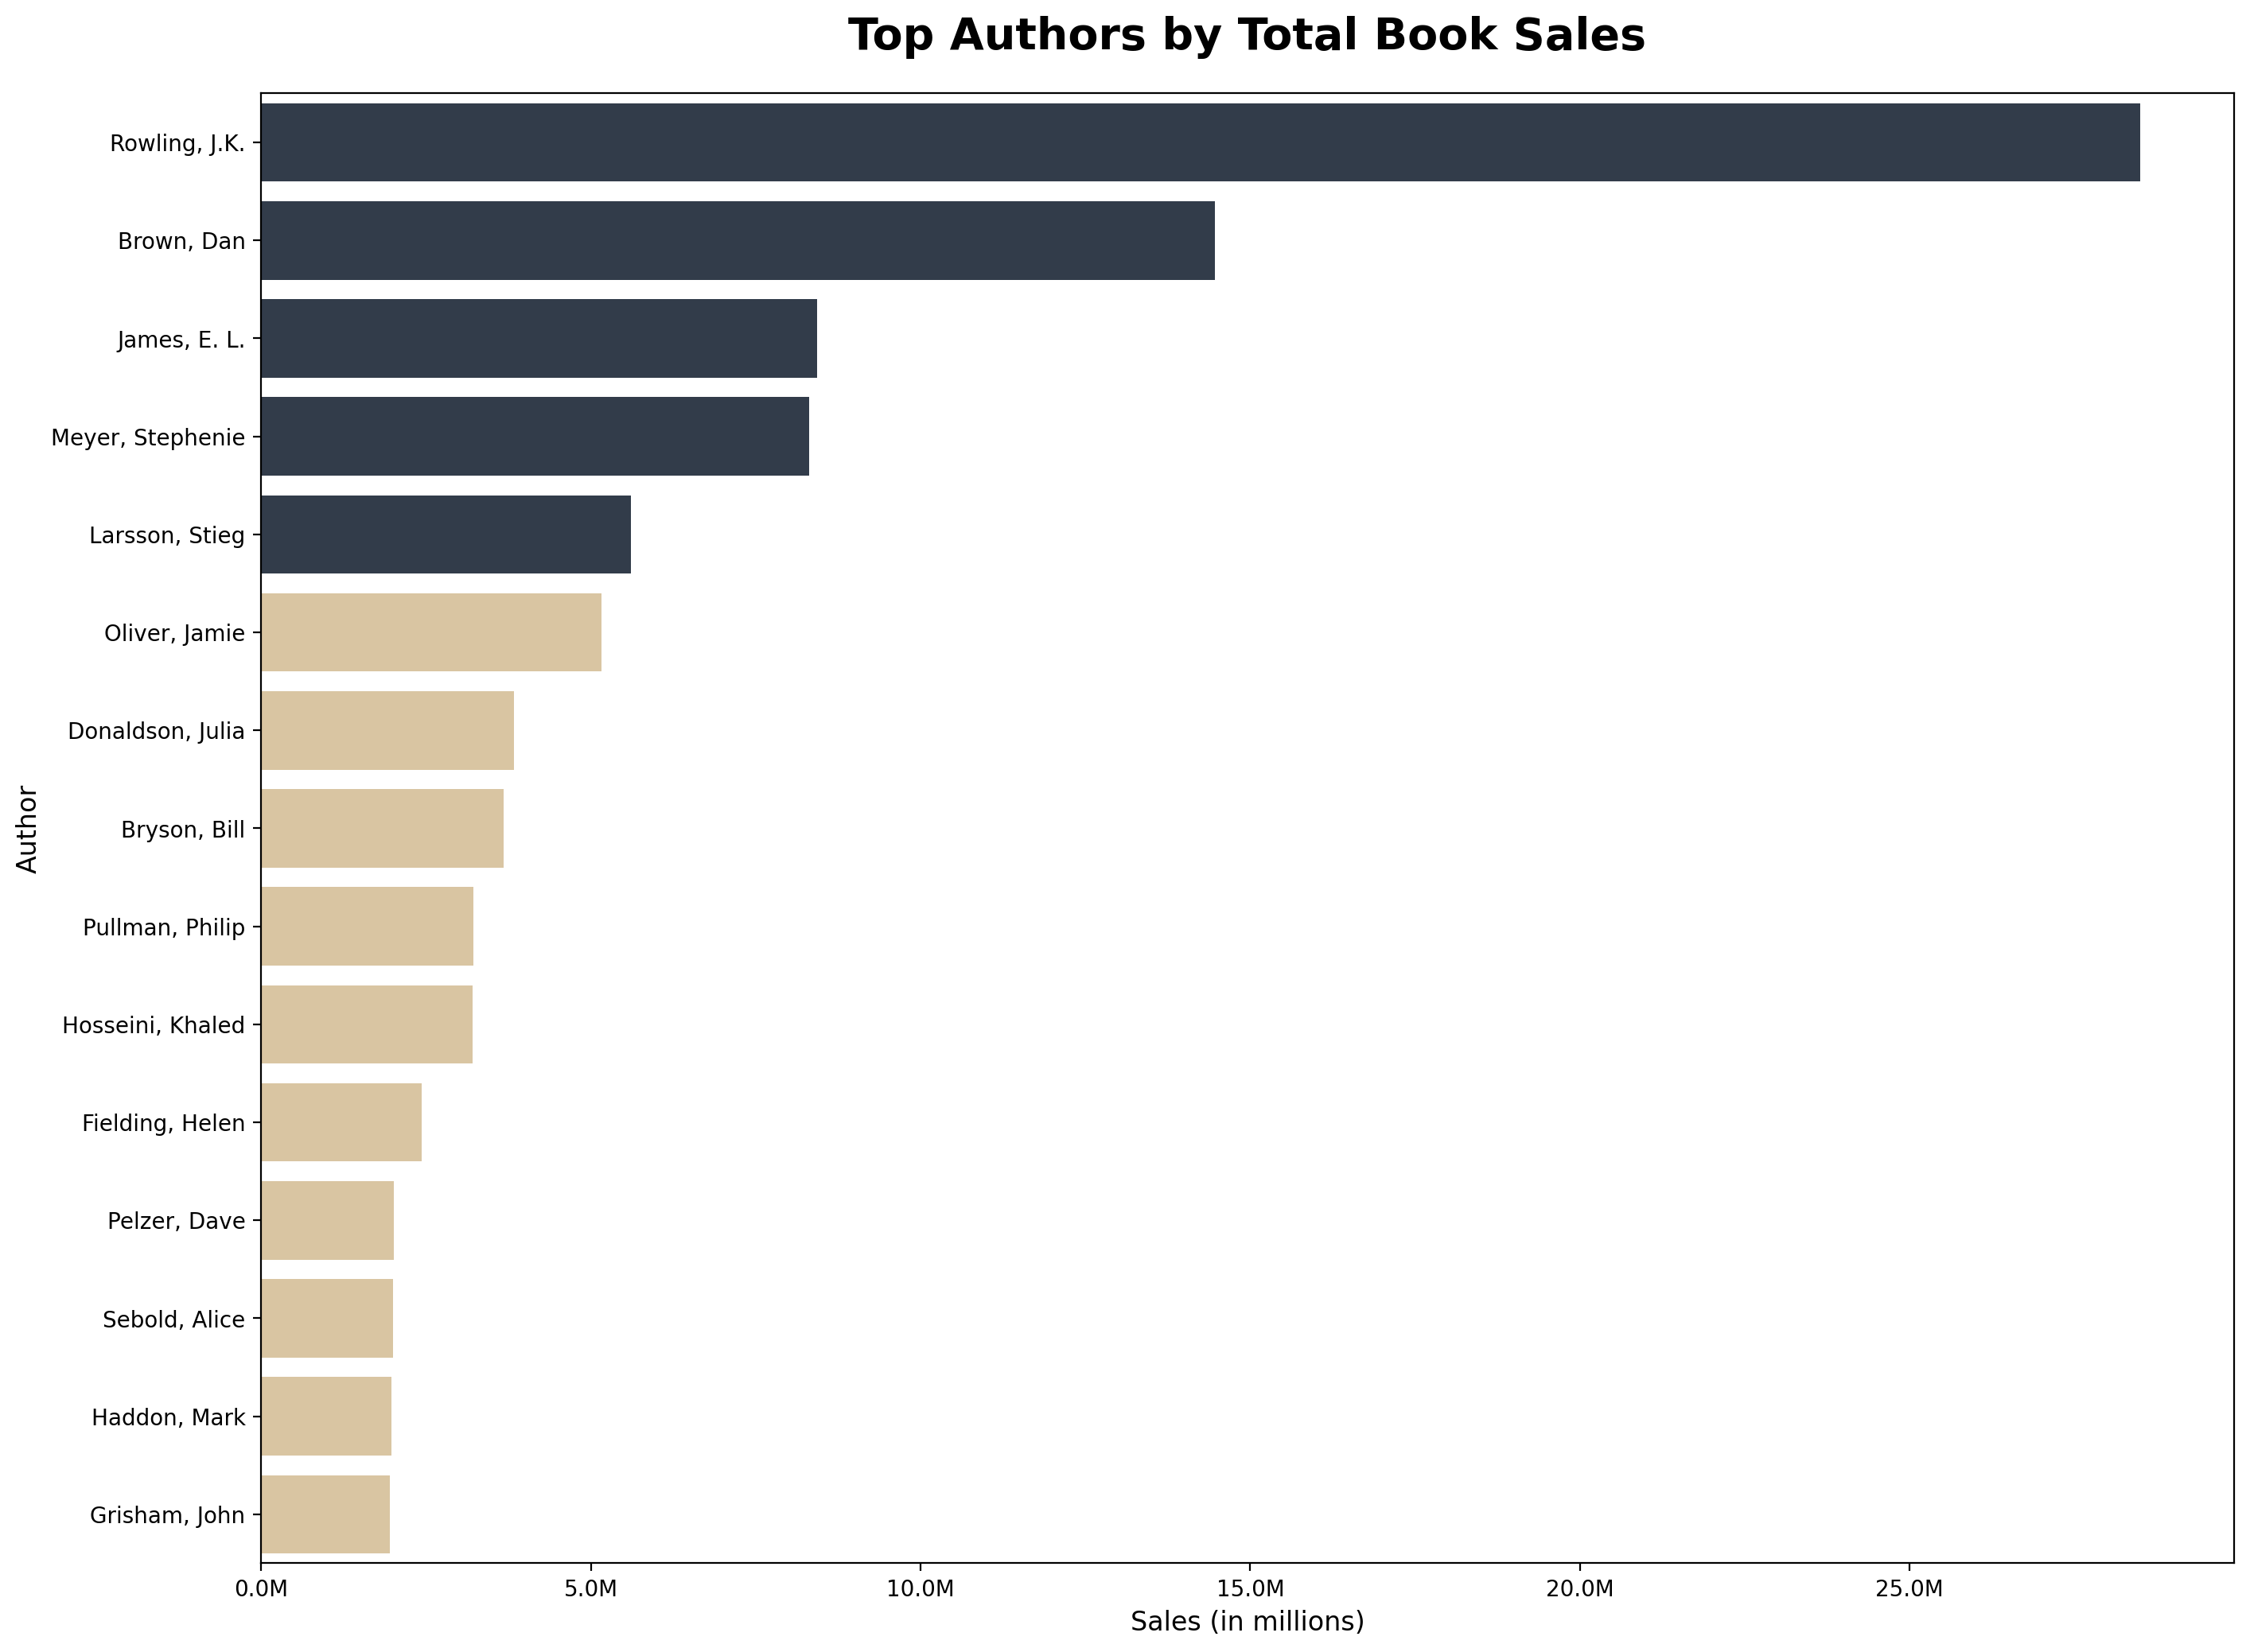

In [325]:
plt.figure(figsize = (16,12), dpi = 200)

# Get the minimum threshold based of the top 5 values for volume sales
top_5_sales_threshold = author_data.nlargest(5, 'volume_sales').volume_sales.min()

# Assign each author True if volume sales meets or is above the threshold, False if not
author_data['top_5_sales'] = author_data.volume_sales.apply(lambda x: True if x >= top_5_sales_threshold else False)

# Sort author_data by volume sales, only keeping the top 15
top_auth_sale_sorted = author_data.sort_values(by = 'volume_sales', ascending = False).head(15)

# Assign color based on value of top_5_sales column
palette = {False: classic_palette[5], True: classic_palette[0]}

# Plot bar graph with top 15 authors in terms of volume sales
top5_bar = sns.barplot(data = top_auth_sale_sorted, y = 'author', x = 'volume_sales', hue = 'top_5_sales', palette= palette, legend = False)

top5_bar.set_title('Top Authors by Total Book Sales', fontsize = 20, fontweight = 'bold', pad = 20)
top5_bar.set_xlabel('Sales (in millions)', fontsize = 12)
top5_bar.set_ylabel('Author', fontsize = 12)
top5_bar.xaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))
plt.show()

In the graph above, the top 5 authors with the most volume sales are picture

TypeError: unsupported operand type(s) for +: 'float' and 'str'

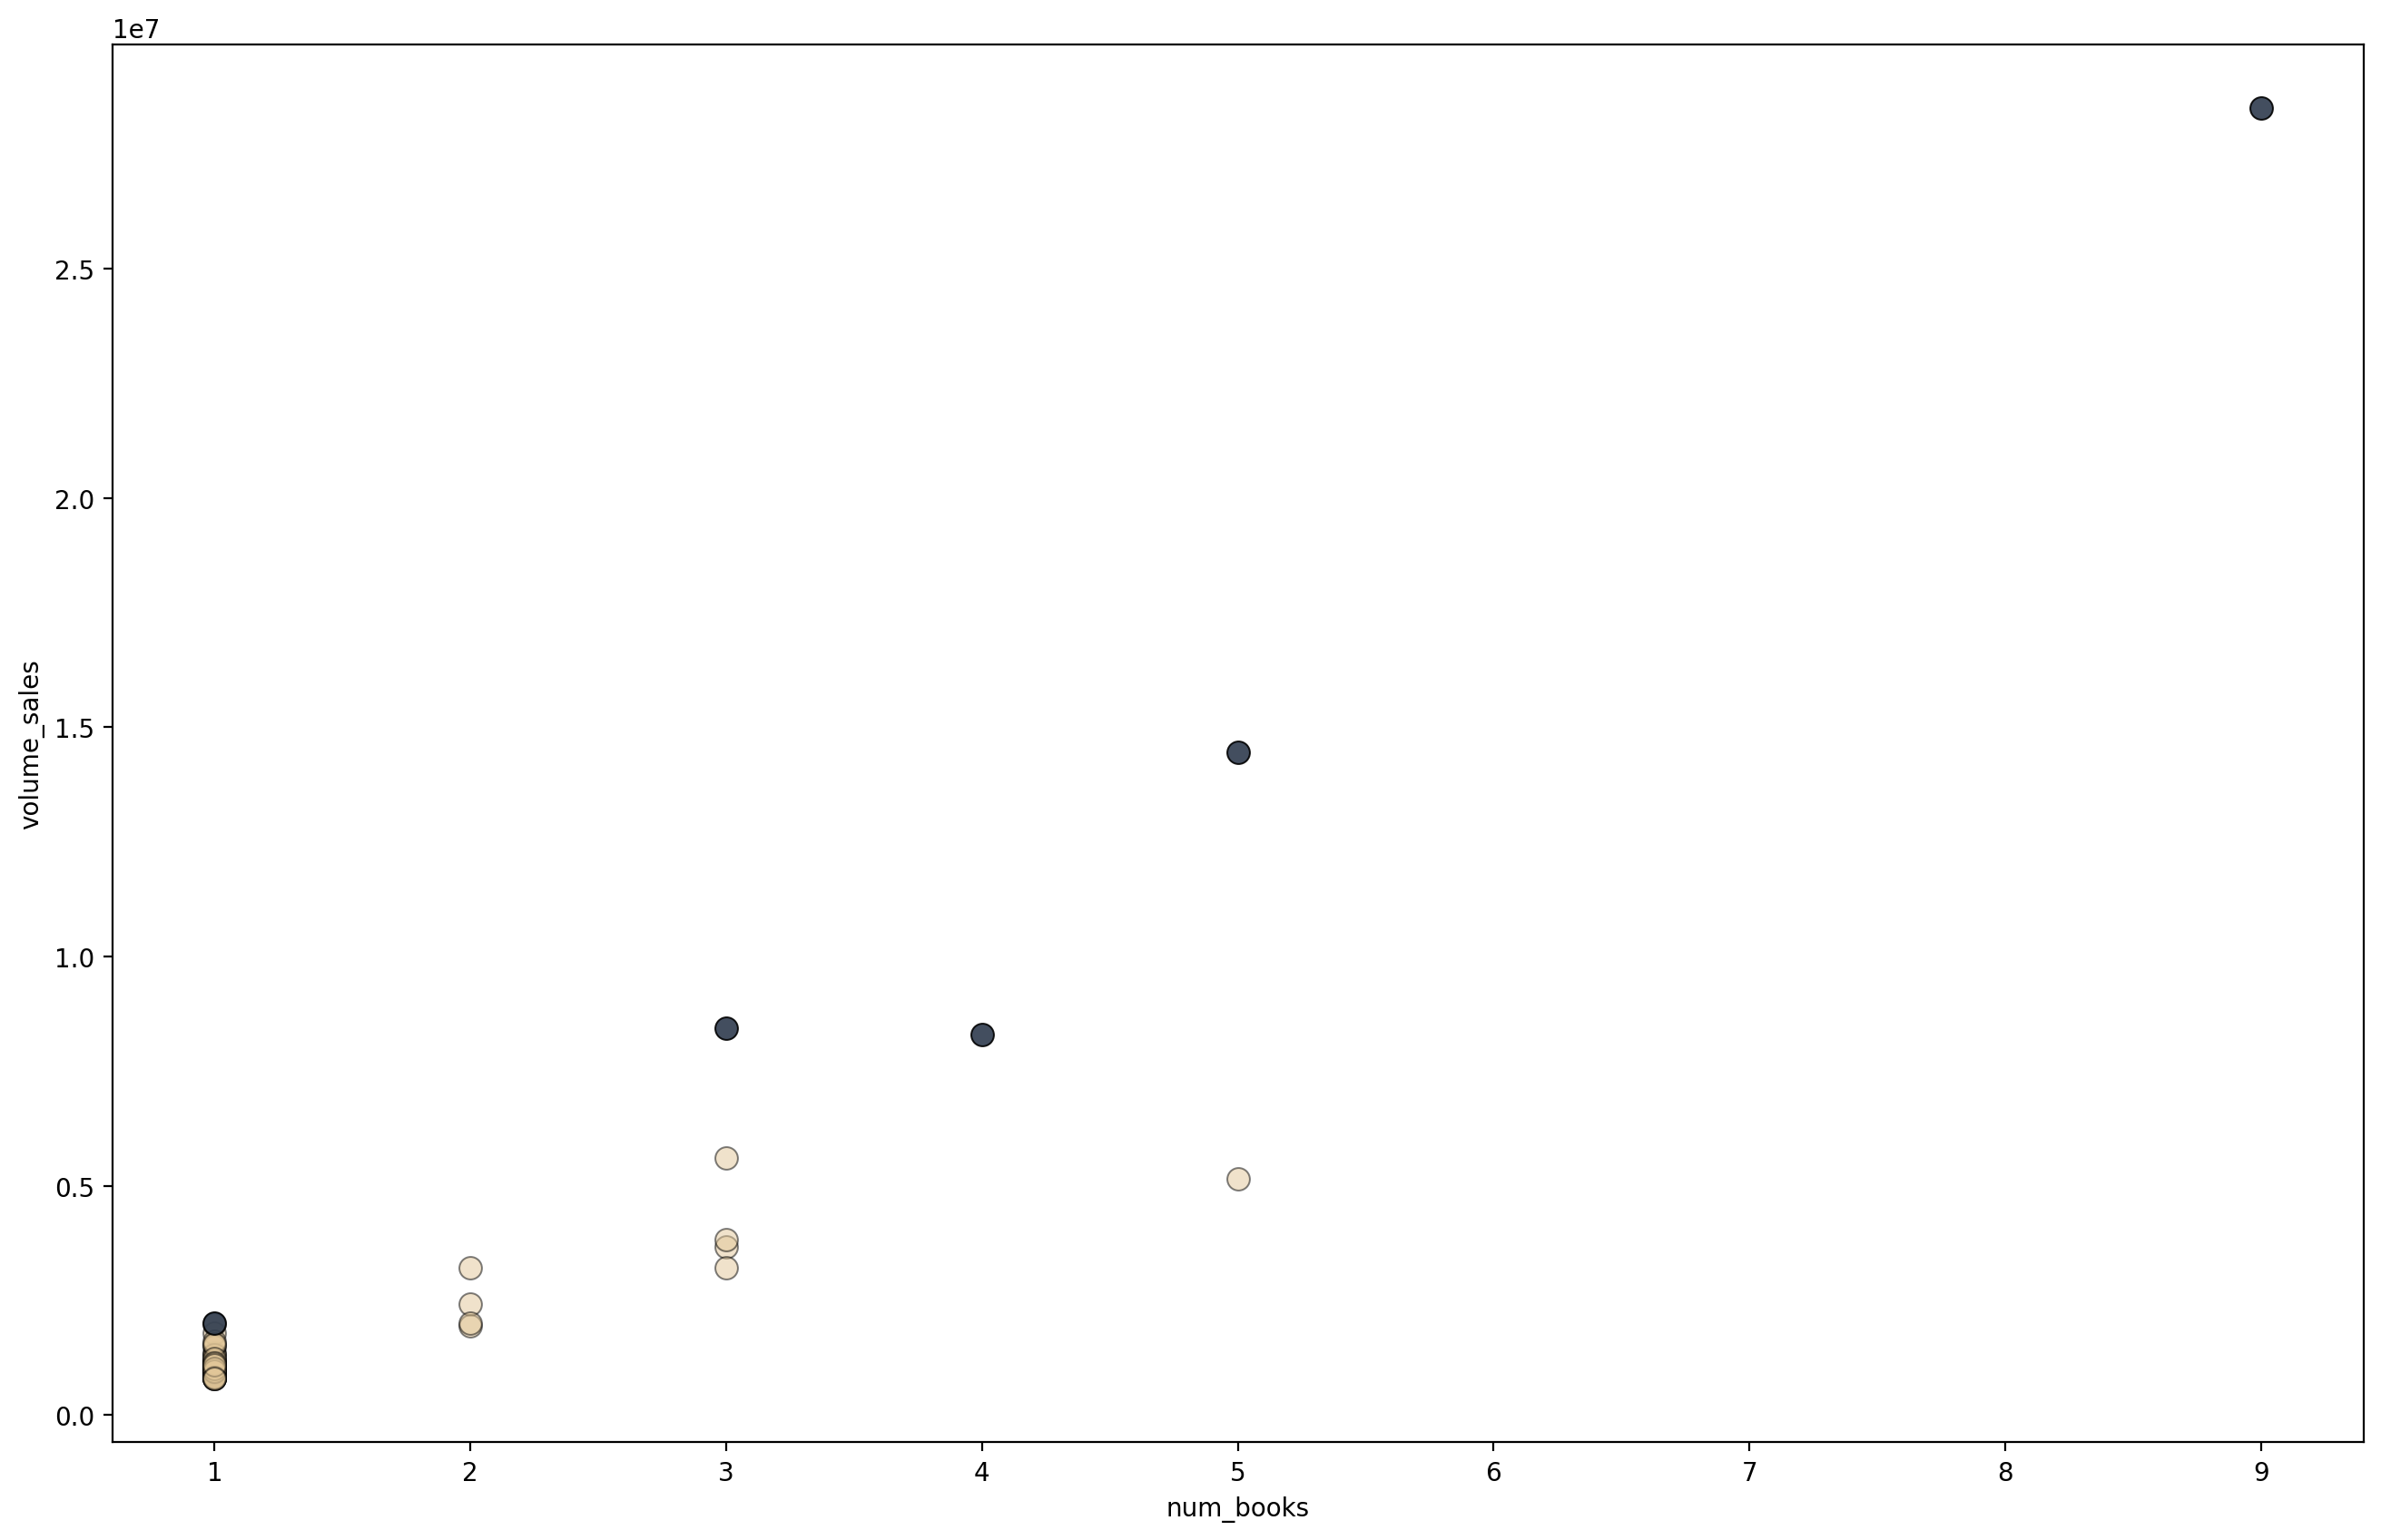

In [230]:
plt.figure(figsize = (16,10), dpi = 200)

top_5_avg_threshold = author_data.sort_values(by='avg_sales_per_book', ascending=False).head(5).avg_sales_per_book
author_data['top_5_avg'] = author_data.avg_sales_per_book.apply(lambda x: True if x >= top_5_avg_threshold.min() else False)

palette = {False: classic_palette[5], True: classic_palette[0]}
# Define alpha values for each category
alpha_values = {False: 0.5, True: 0.9}
for top_5_category in author_data.top_5_avg.unique():
    subset = author_data[author_data.top_5_avg == top_5_category]
    sns.scatterplot(data = subset, x = 'num_books', y = 'volume_sales', 
    color = palette[top_5_category], 
    edgecolor='black', 
    s=80, alpha = alpha_values[top_5_category]
    )

# Annotate high volume sales outliers
for index, row in pd.concat([top_5_sales, top_5_avg_sales]).iterrows():
    author_name = row['first_name'] + ' ' + row['last_name']
    #plt.text(row['num_books'],  row['volume_sales'],   author_name,   fontsize=10,   ha='right',  color='red')
    plt.text(row['num_books'] + 0.1, row['volume_sales'] + 500000, author_name, fontsize=9, ha='left')

# Customizations
plt.xlabel("Number of Books")
plt.ylabel("Total Sales (millions)")
plt.title("Authors: Books vs Sales")

legend_labels = {
    palette[True]: "Top 5 Avg Sales per Book",
}
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
    for color, label in legend_labels.items()
]
plt.legend(handles=handles, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
#plt.xticks(rotation=45)

plt.show()

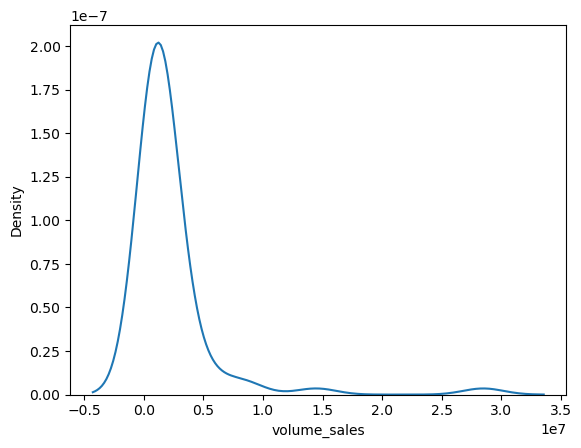

Skewness of Sales Data: 5.268772534603662


In [263]:
sns.kdeplot(data = author_data, x = 'volume_sales')
plt.show()

# Check skewness
print("Skewness of Sales Data:", author_data['volume_sales'].skew())

Since skewness is high (e.g., > 1.0), we will be using a log scale for our scatterplot.

In [139]:
top_5_avg_sales.sort_values(by = 'volume_sales', ascending = False)

,author,num_books,volume_sales,first_name,last_name,avg_sales_per_book,color
55,"Rowling, J.K.",9,28494745,J.K.,Rowling,3.166083e+06,red
7,"Brown, Dan",5,14462827,Dan,Brown,2.892565e+06,red
29,"James, E. L.",3,8432648,E. L.,James,2.810883e+06,red
42,"Meyer, Stephenie",4,8308136,Stephenie,Meyer,2.077034e+06,red
57,"Sebold, Alice",1,2005598,Alice,Sebold,2.005598e+06,red


In [138]:
auth_sale_sorted.head()

,author,num_books,volume_sales,first_name,last_name,avg_sales_per_book
55,"Rowling, J.K.",9,28494745,J.K.,Rowling,3.166083e+06
7,"Brown, Dan",5,14462827,Dan,Brown,2.892565e+06
29,"James, E. L.",3,8432648,E. L.,James,2.810883e+06
42,"Meyer, Stephenie",4,8308136,Stephenie,Meyer,2.077034e+06
31,"Larsson, Stieg",3,5603489,Stieg,Larsson,1.867830e+06


In [106]:
auth_sale_sorted.sort_values(by = 'avg_sales_per_book', ascending = False).head(10)

,author,num_books,volume_sales,first_name,last_name,avg_sales_per_book
55,"Rowling, J.K.",9,28494745,J.K.,Rowling,3.166083e+06
7,"Brown, Dan",5,14462827,Dan,Brown,2.892565e+06
29,"James, E. L.",3,8432648,E. L.,James,2.810883e+06
42,"Meyer, Stephenie",4,8308136,Stephenie,Meyer,2.077034e+06
57,"Sebold, Alice",1,2005598,Alice,Sebold,2.005598e+06
22,"Haddon, Mark",1,1979552,Mark,Haddon,1.979552e+06
31,"Larsson, Stieg",3,5603489,Stieg,Larsson,1.867830e+06
9,"Carle, Eric",1,1783535,Eric,Carle,1.783535e+06
46,"Nicholls, David",1,1616068,David,Nicholls,1.616068e+06
28,"Hosseini, Khaled",2,3213111,Khaled,Hosseini,1.606556e+06


### Is there a correlation between the number of books an publisher or author has in the top 100 and their total sales?

To determine the relationship between the number of books a publisher or author has in the top 100 and their total sales, we will calculate the correlation coefficient and visualize the data using scatterplots with regression lines.



A high correlation would suggest that having multiple bestsellers significantly impacts total sales, while a low correlation might indicate that sales depend more on other factors

In [59]:
author_book_sales_corr, p_value = stats.pearsonr(author_data.num_books, author_data.volume_sales)
publisher_book_sales_corr, p_value = stats.pearsonr(publisher_data.num_books, publisher_data.volume_sales)

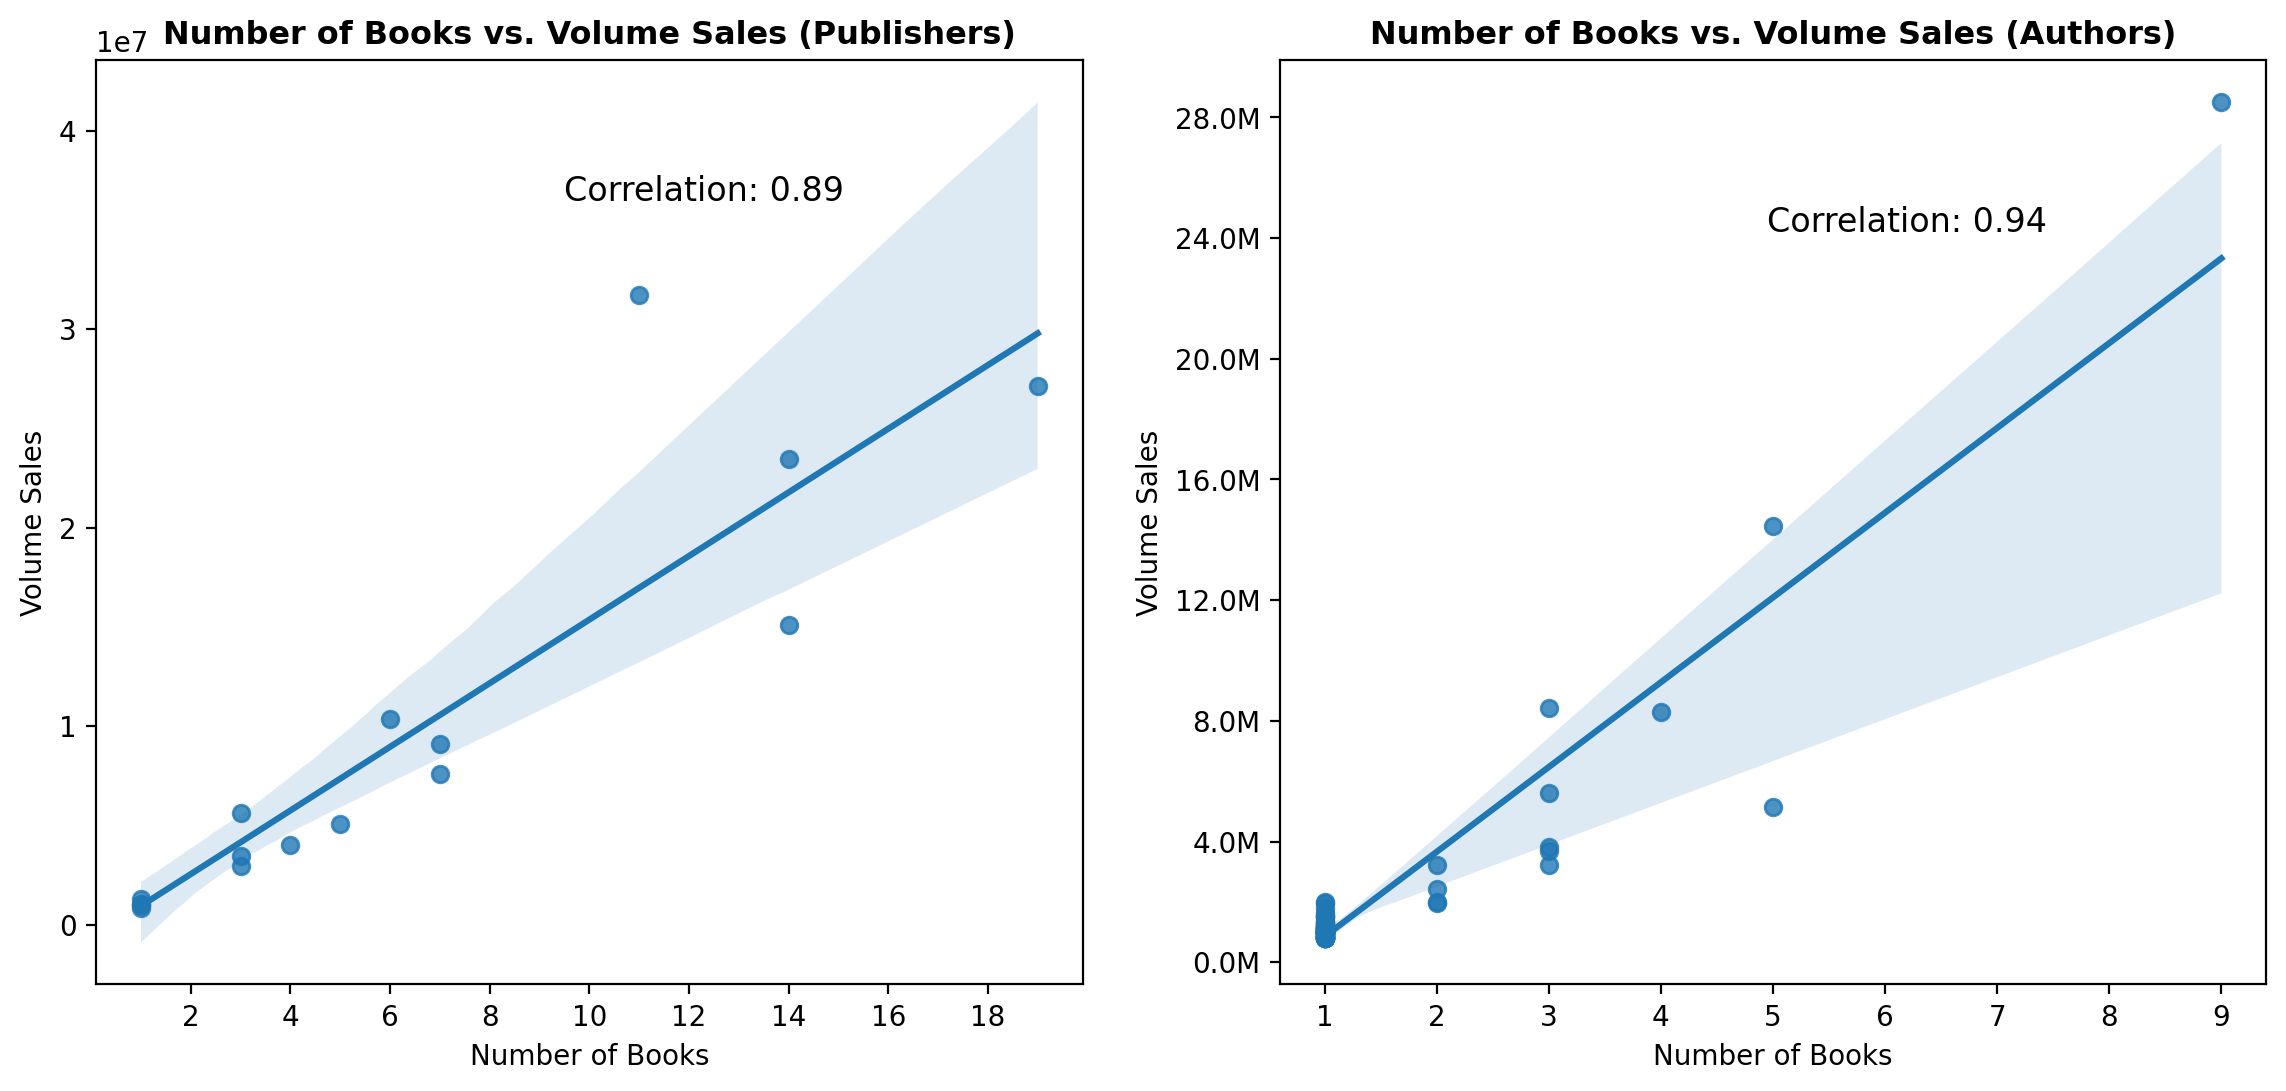

In [60]:
plt.figure(figsize = (14,6), dpi = 200)

# Plot regression graph with the number of books vs volume sales for each publisher
publish_scatter = plt.subplot(1, 2, 1)
sns.regplot(data = publisher_data, x = 'num_books', y = 'volume_sales')

publish_scatter.set_title('Number of Books vs. Volume Sales (Publishers)', fontsize = 11.5, fontweight = 'bold')
publish_scatter.set_ylabel('Volume Sales', fontsize = 10)
publish_scatter.set_xlabel('Number of Books', fontsize = 10)
publish_scatter.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.text(x = publisher_data.num_books.max() * 0.5, y = publisher_data.volume_sales.max() * 1.15, s = f'Correlation: {publisher_book_sales_corr:.2f}', fontsize = 12)

# Plot regression graph with the number of books vs volume sales for each author
author_scatter = plt.subplot(1, 2, 2)
sns.regplot(data = author_data, x = 'num_books', y = 'volume_sales')

author_scatter.set_title('Number of Books vs. Volume Sales (Authors)', fontsize = 11.5, fontweight = 'bold')
author_scatter.set_ylabel('Volume Sales', fontsize = 10)
author_scatter.set_xlabel('Number of Books', fontsize = 10)
author_scatter.xaxis.set_major_locator(MaxNLocator(integer=True))
author_scatter.yaxis.set_major_locator(MaxNLocator(integer=True))
author_scatter.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))
plt.text(x = author_data.num_books.max() * 0.55, y = author_data.volume_sales.max() * .85, s = f'Correlation: {author_book_sales_corr:.2f}', fontsize = 12)

plt.show()

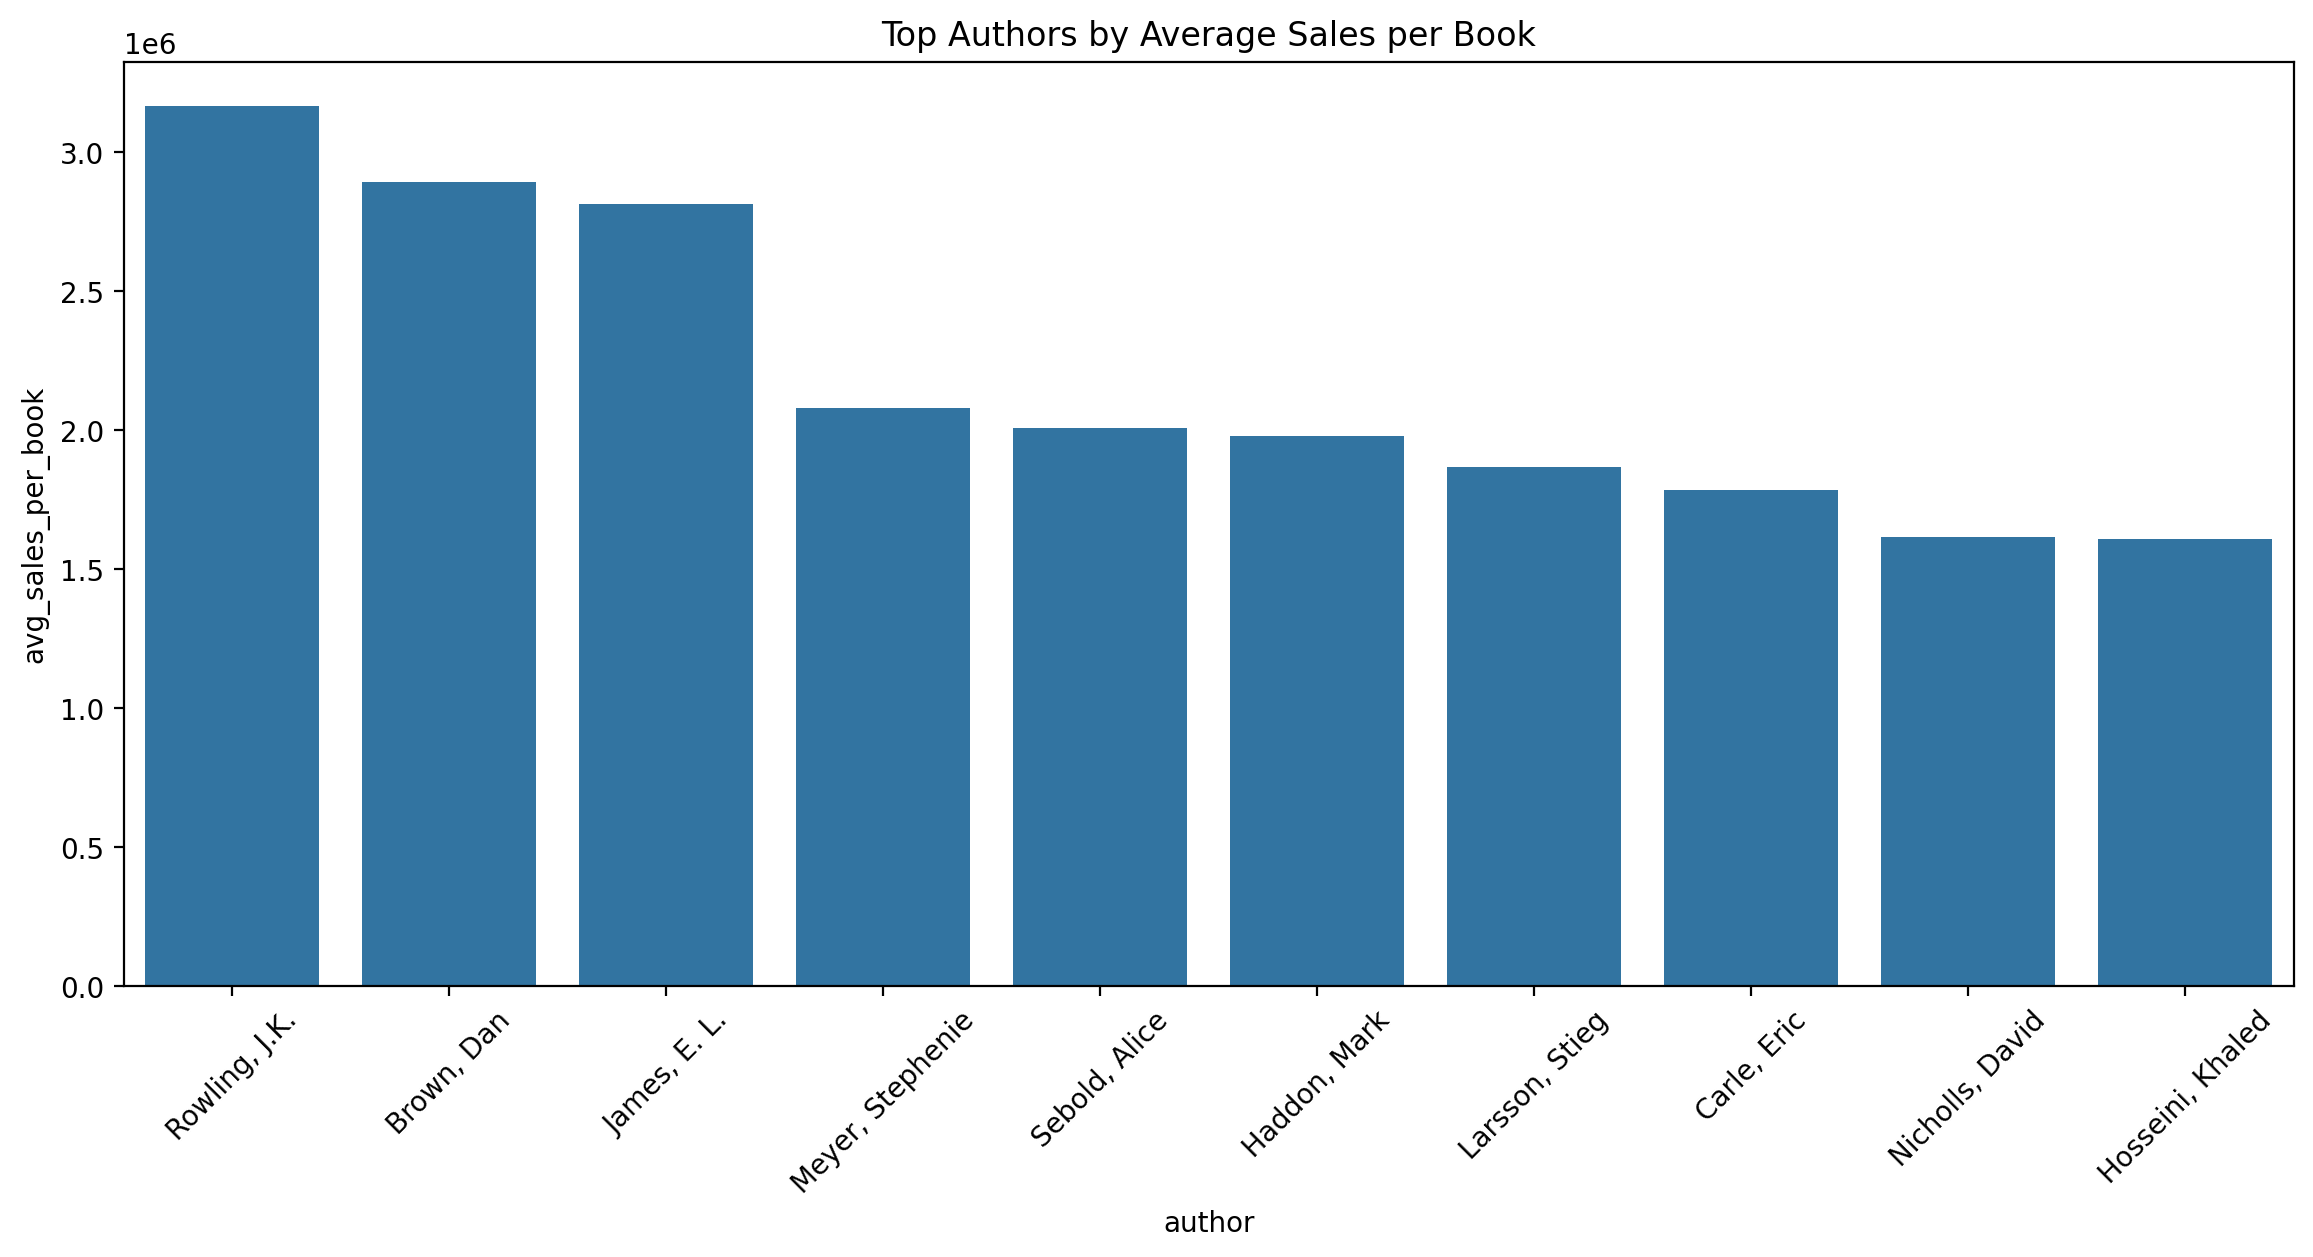

In [61]:
plt.figure(figsize = (14,6), dpi = 200)

# Plot regression graph with the number of books vs volume sales for each publisher
top_authors = author_data.sort_values(by='avg_sales_per_book', ascending=False).head(10)
sns.barplot(data=top_authors, x='author', y='avg_sales_per_book')
plt.xticks(rotation=45)
plt.title('Top Authors by Average Sales per Book')
plt.show()

The results show a strong positive correlation between the number of books and total sales for both publishers (0.89) and authors (0.94). This suggests that, in general, having more best-selling books contributes to higher total sales.

### Sales Distribution across Books

### Top-selling Books by Publisher

In [63]:
publisher_data

,parent_company,publisher_abbrev,num_books,volume_sales,avg_sales_per_book
0,Hachette Livre,Headline,3,2940502,9.801673e+05
1,Hachette Livre,Hodder,3,3440411,1.146804e+06
2,Hachette Livre,Little Brown,6,10383181,1.730530e+06
3,Hachette Livre,Orion,5,5091561,1.018312e+06
4,Hachette Livre,Quercus,3,5603489,1.867830e+06
5,Holtzbrinck Publishing,Pan Macmillan,7,9085383,1.297912e+06
6,Independent,Bloomsbury,11,31707856,2.882532e+06
7,Independent,Canongate,1,1310176,1.310176e+06
8,Independent,D.C. Thomson,1,816585,8.165850e+05
9,Independent,Profile Books,1,1023688,1.023688e+06


<Axes: xlabel='publisher_abbrev'>

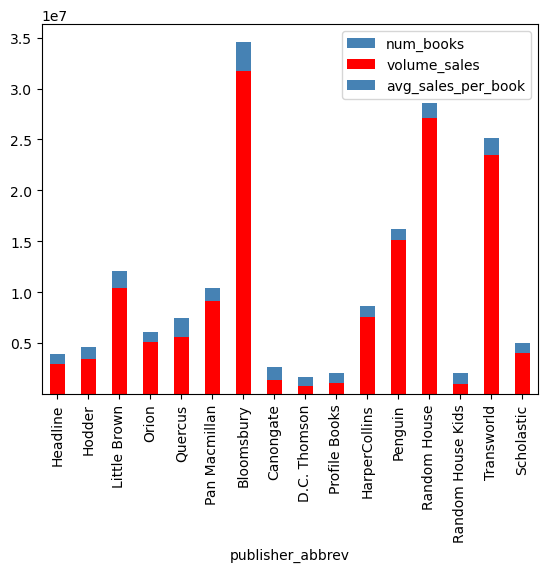

In [64]:
publisher_data.set_index('publisher_abbrev').plot(kind = 'bar', stacked = True, color= ['steelblue', 'red'])

### Sales Trend by Genre

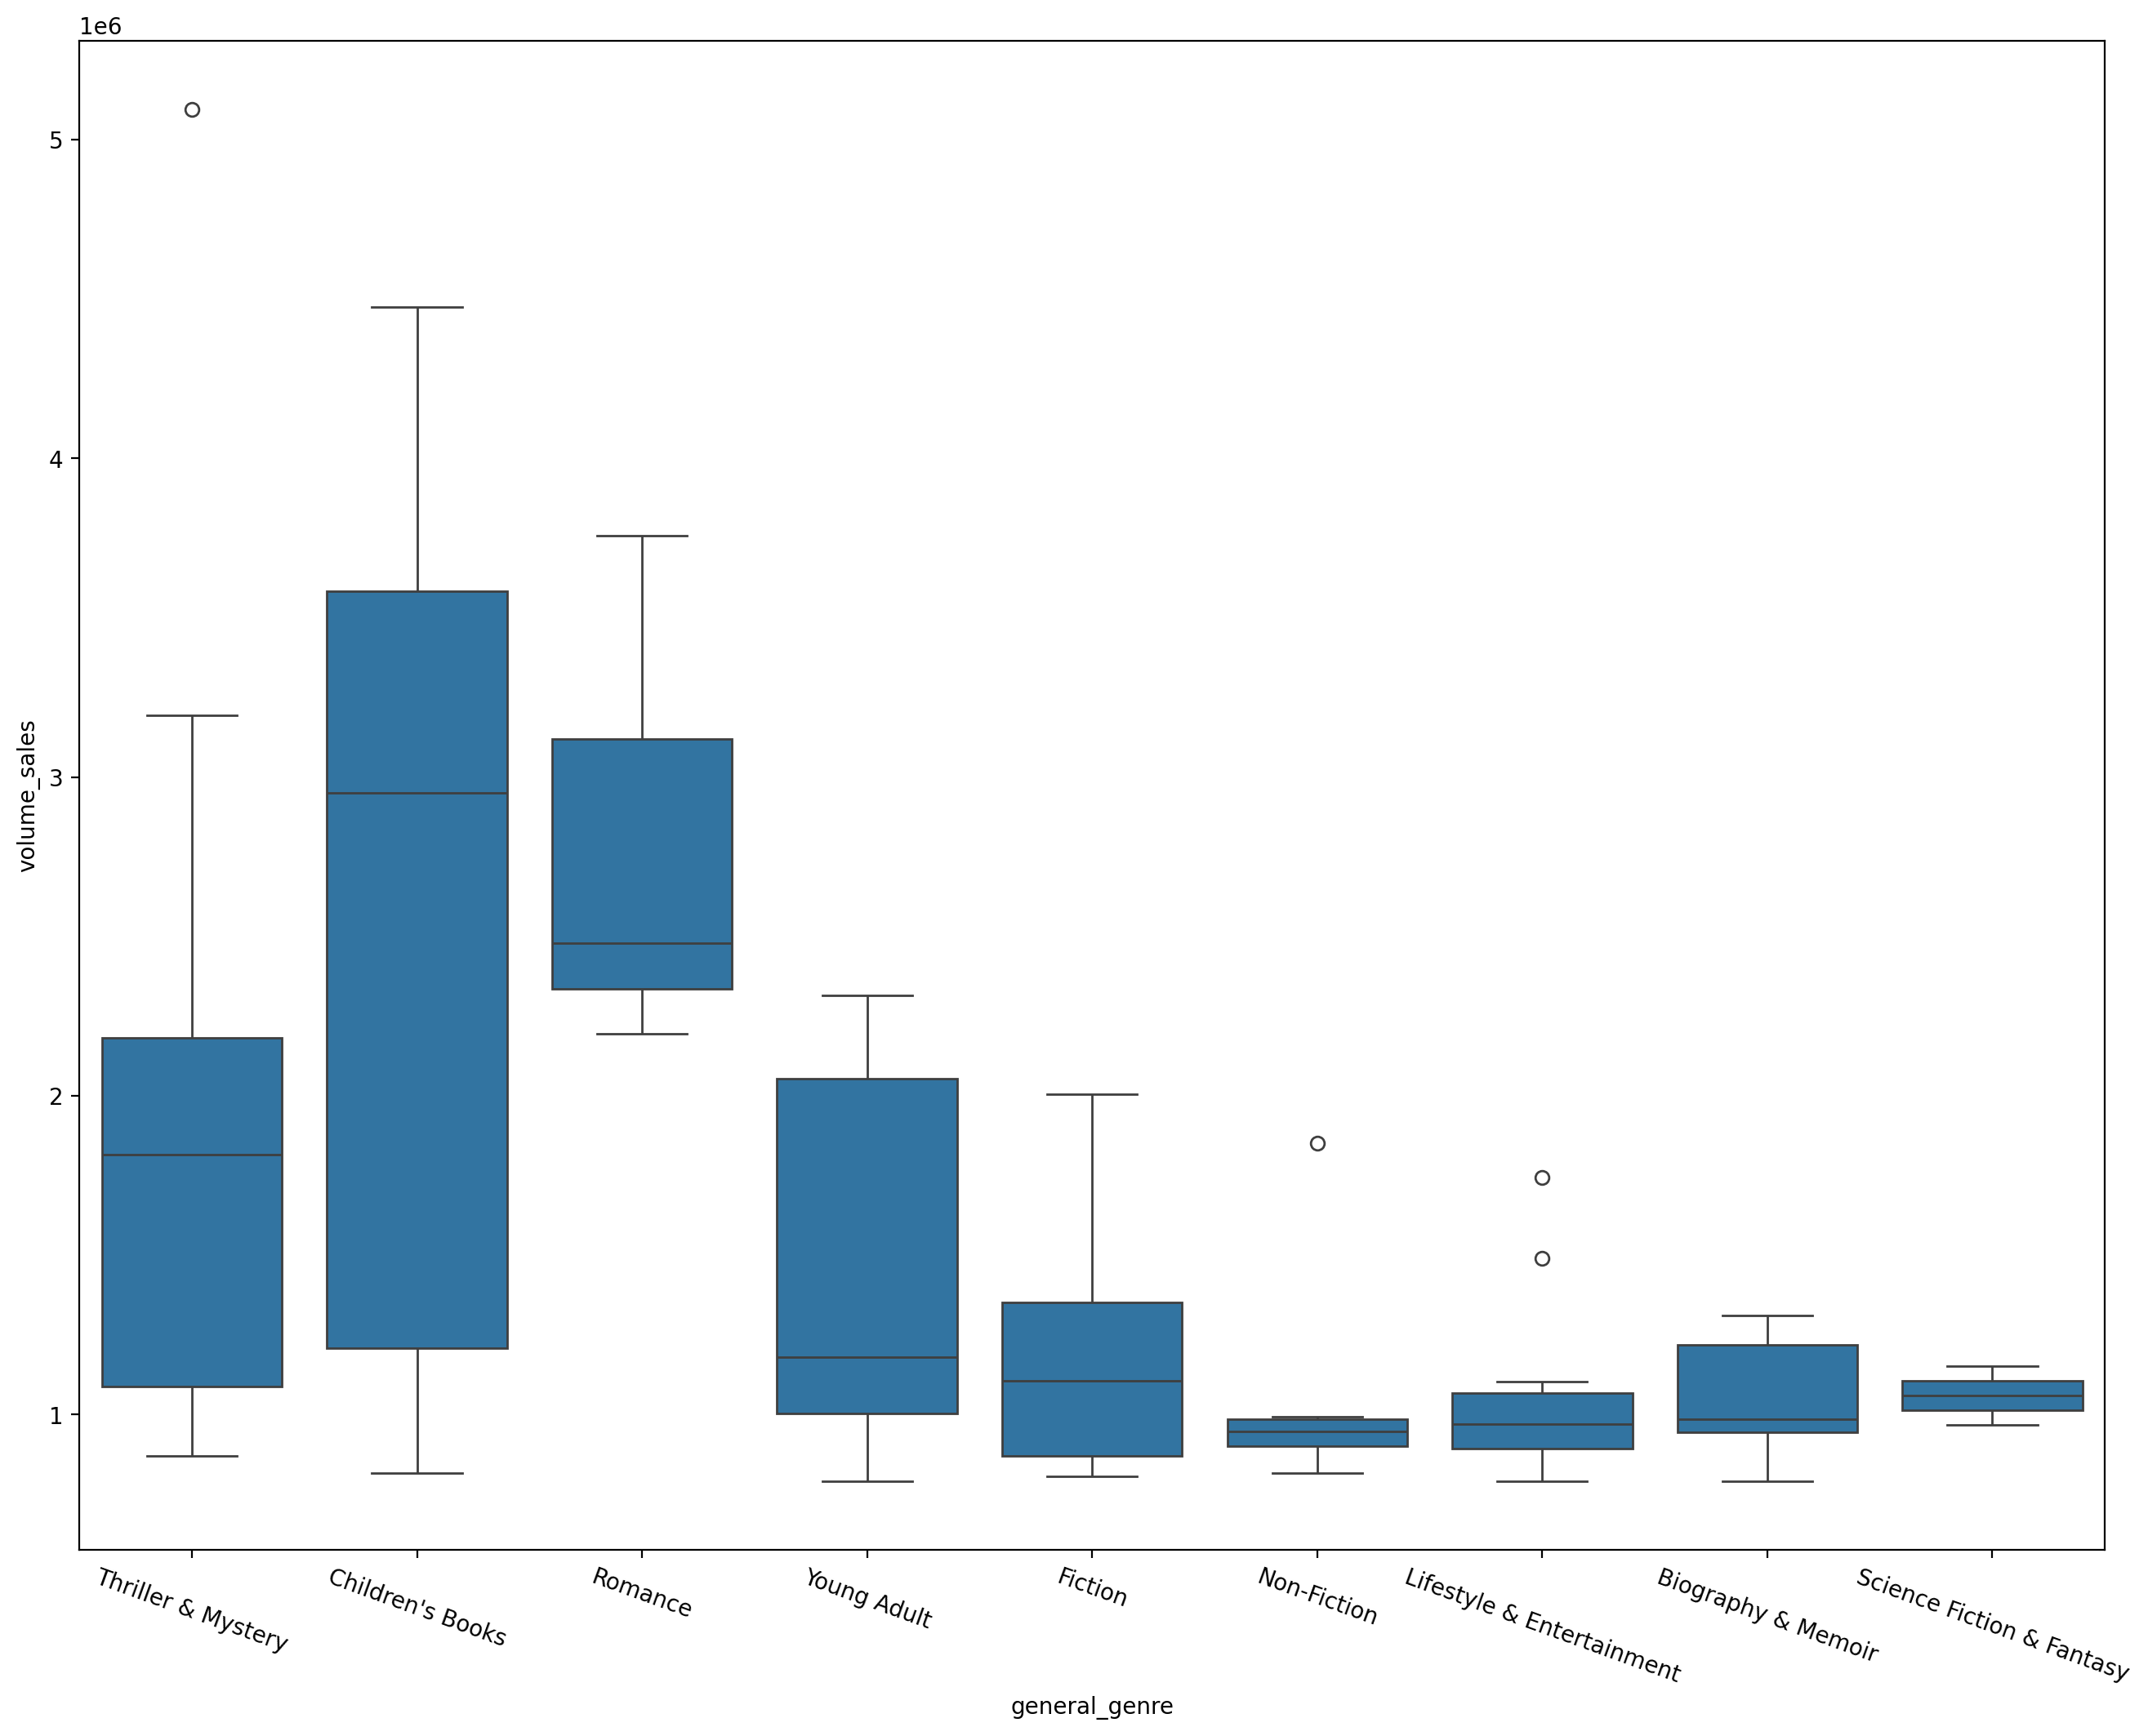

In [26]:
plt.figure(figsize = (16,12), dpi = 200)

sns.boxplot(data = books, x = 'general_genre', y = 'volume_sales')

plt.xticks(rotation = -20) 
plt.show()

### Author Contribution to Sales

### Cumulative Sales by Rank

/var/folders/g8/1gqw4_r54dl1wk0fnkldx2qc0000gn/T/ipykernel_74109/219997144.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-85, ha='left')


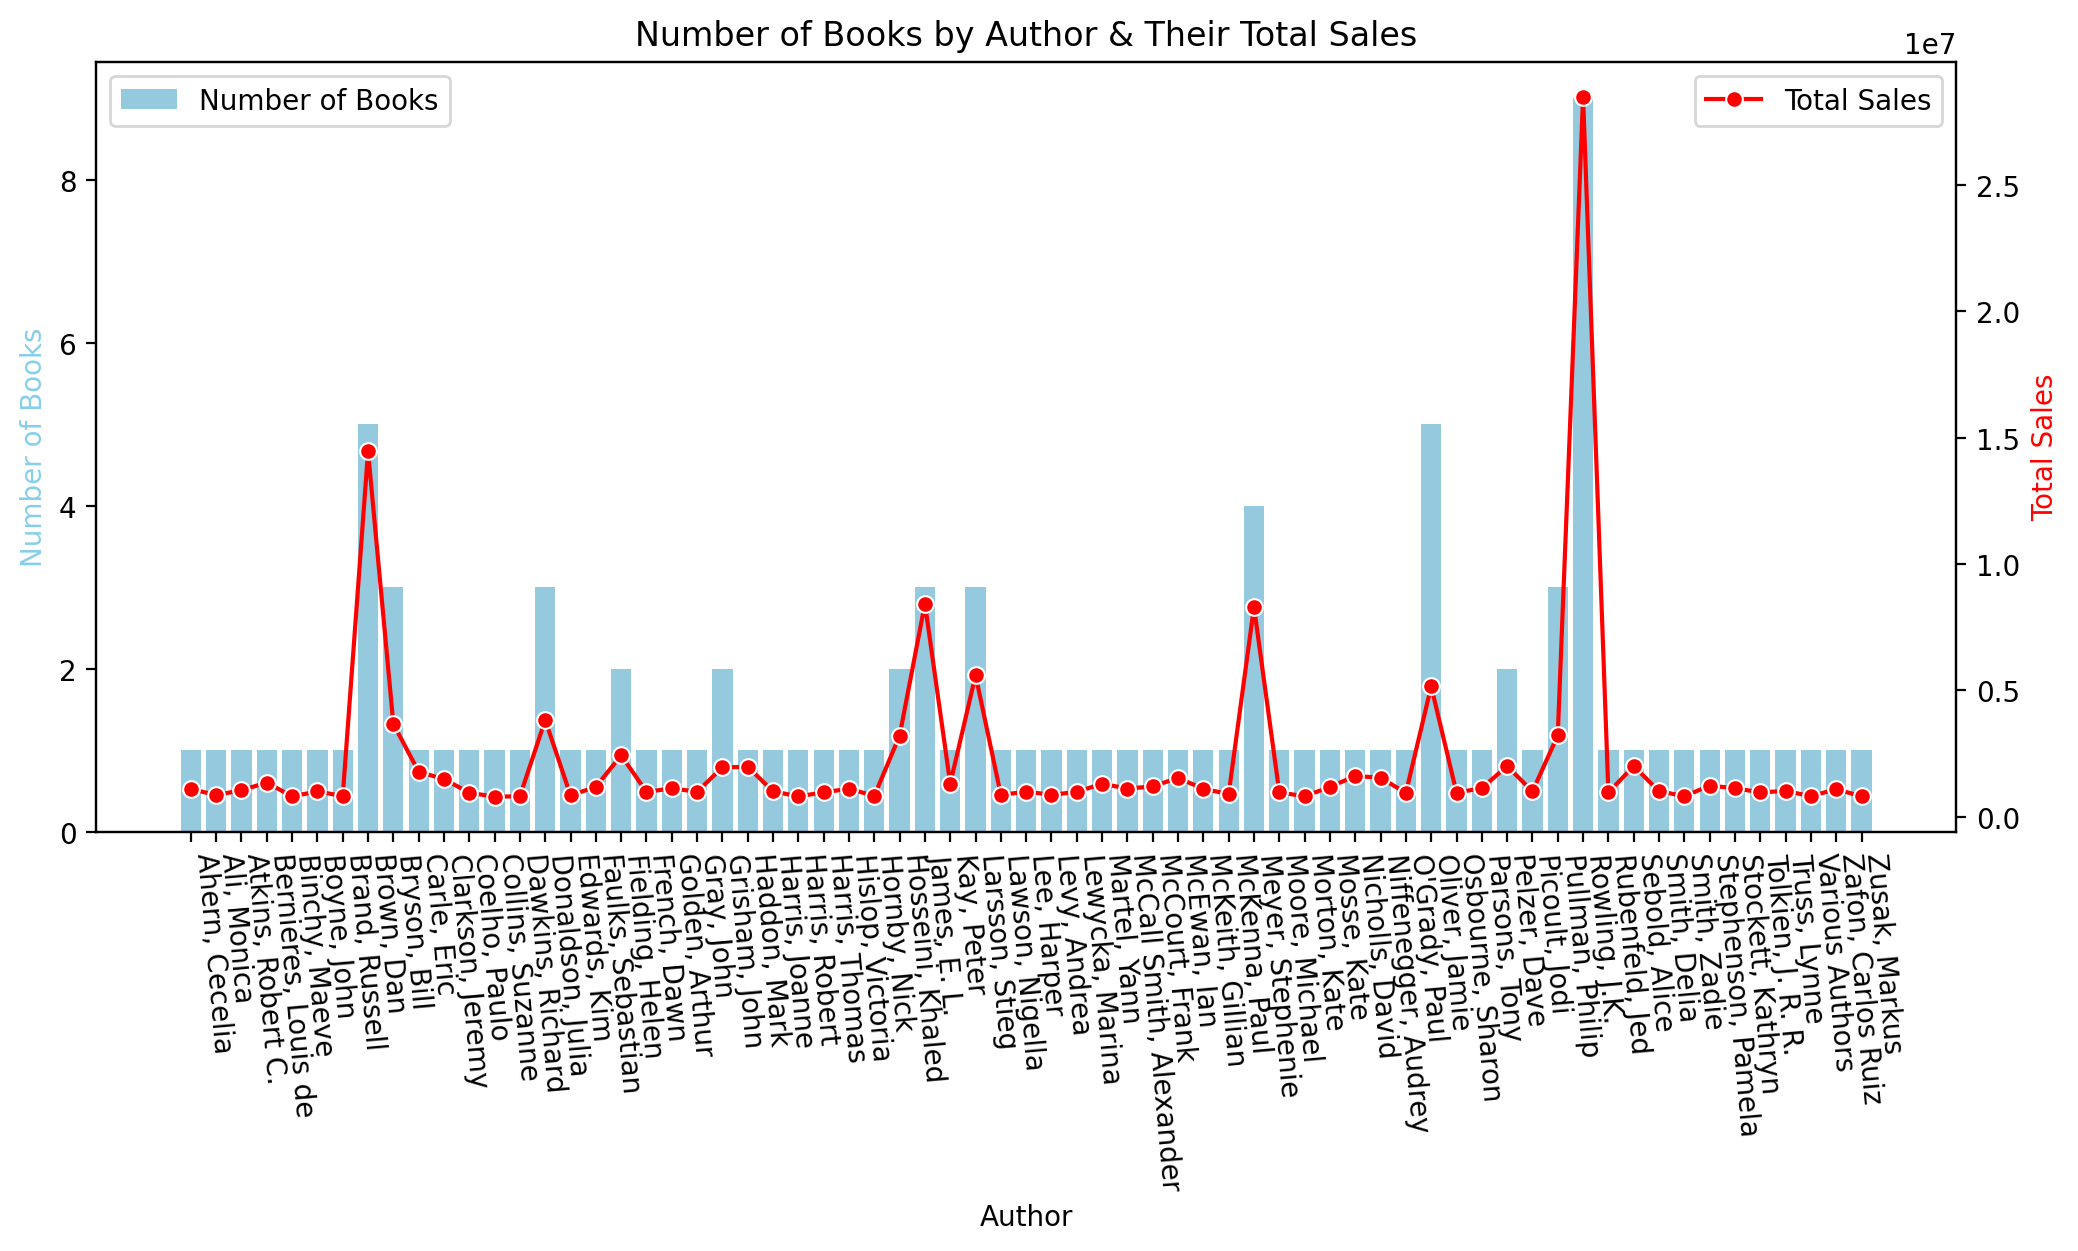

In [37]:
fig, ax1 = plt.subplots(figsize=(12, 5), dpi=200)

# Bar plot for the number of books (primary y-axis)
sns.barplot(data=author_data, x='author', y='num_books', color='skyblue', ax=ax1, label='Number of Books')

# Create a secondary y-axis for total sales
ax2 = ax1.twinx()
sns.lineplot(data = author_data, x='author', y='volume_sales', color='red', marker='o', ax=ax2, label='Total Sales')

# Labels and title
ax1.set_xlabel("Author")
ax1.set_ylabel("Number of Books", color='skyblue')
ax2.set_ylabel("Total Sales", color='red')
plt.title("Number of Books by Author & Their Total Sales")

# Rotate x-axis labels for readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-85, ha='left')

# Show the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
plt.figure(figsize = (12,5), dpi = 200)
sns.boxplot(data = books, x = 'parent_company', y = 'volume_sales')
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Penguin Random House'),
  Text(1, 0, 'Independent'),
  Text(2, 0, 'Hachette Livre'),
  Text(3, 0, 'Holtzbrinck Publishing'),
  Text(4, 0, 'News Corp'),
  Text(5, 0, 'Scholastic Corporation')])

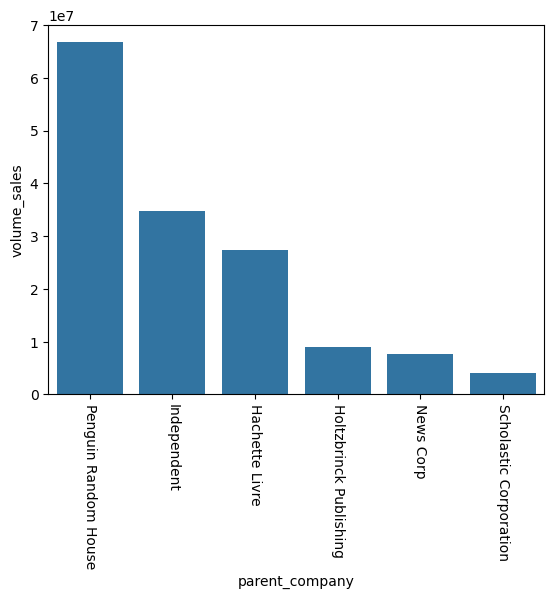

In [27]:
publisher_sales = books.groupby('parent_company').volume_sales.sum().sort_values(ascending = False).reset_index()

sns.barplot(data = publisher_sales, x = 'parent_company', y = 'volume_sales')
plt.xticks(rotation = -90)